In [1]:
import pandas as pd

daily_agg_df = pd.read_csv('./datasets/Raw Datset II.Daily aggregates_Gray_LaPlante_PAB_2012.dat', delimiter='\t')
rg_det_df = pd.read_csv('./datasets/Raw Datset III.Responsible gambling details_Gray_LaPlante_PAB_2012.dat', delimiter='\t')
demog_df = pd.read_csv('./datasets/Raw Datset I.Demographics_Gray_LaPlante_PAB_2012.dat', delimiter='\t')




C:\Users\abhiv\AppData\Local\Temp\ipykernel_19452\1360108055.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_agg_df = pd.read_csv('./datasets/Raw Datset II.Daily aggregates_Gray_LaPlante_PAB_2012.dat', delimiter='\t')


In [2]:
rg_det_df

UserID  RGsumevents RGFirst_Date RGLast_date  Event_type_first  \
0     2169867            1   11/19/2009  11/19/2009                 9   
1     7035862            1   11/15/2009  11/15/2009                 9   
2     5911218            1    11/8/2009   11/8/2009                 9   
3     5872708            1    11/3/2009   11/3/2009                 9   
4     5746942            2   10/18/2009   11/3/2009                 9   
...       ...          ...          ...         ...               ...   
2063  2451840            5                11/3/2009                12   
2064  9140426            1    8/19/2009   8/19/2009                10   
2065  2590026            2     8/5/2009    8/6/2009                10   
2066  1023918            1     4/9/2009    4/9/2009                 6   
2067  6691324            1   12/19/2008  12/19/2008                 1   

     Interventiontype_first  
0                        18  
1                        18  
2                        18  
3                        18  
4                        18  
...                     ...  
2063                         
2064                         
2065                         
2066                         
2067                         

[2068 rows x 6 columns]

In [3]:
demog_df

USERID  RG_case  CountryName LanguageName Gender YearofBirth  \
0     2975944        1      Germany       German      M        1970   
1     9822065        1  Germany.COM       German      F        1963   
2     9622454        1   France.COM       French      F        1981   
3     9619356        1     Italy.IT      Italian      F        1975   
4     9593498        1  Germany.COM       German      F        1990   
...       ...      ...          ...          ...    ...         ...   
4129   107292        0      Austria       German      M        1975   
4130    92140        0      Austria       German      M        1973   
4131    80281        0      Austria       German      M        1970   
4132    74438        0      Austria       German      M        1975   
4133    36822        0      Austria       German      M        1970   

     Registration_date First_Deposit_Date  
0             6/2/2006           6/9/2006  
1           11/21/2009         11/21/2009  
2           10/19/2009         10/19/2009  
3           10/18/2009         10/18/2009  
4           10/14/2009         10/14/2009  
...                ...                ...  
4129          7/9/2000           7/9/2000  
4130         6/25/2000          6/25/2000  
4131         6/13/2000          6/13/2000  
4132          6/9/2000           6/9/2000  
4133         3/20/2000           5/8/2000  

[4134 rows x 8 columns]

In [4]:
daily_agg_df

UserID        Date  ProductType Turnover     Hold NumberofBets
0         31965    5/8/2000            1  15.3388  15.3388            1
1         31965   5/10/2000            1  34.1594  34.1594            5
2         31965   5/18/2000            1  24.5419  24.5419            4
3         31965   5/22/2000            1   2.5309   2.5309            1
4         31965   5/23/2000            1  15.3387  15.3387            2
...         ...         ...          ...      ...      ...          ...
981777  9200696  10/12/2010           25                             95
981778  7912483   9/23/2010           25                             60
981779  9200696  10/11/2010           25                              2
981780  9200696  10/14/2010           25                              2
981781  9200696  10/24/2010           25                              2

[981782 rows x 6 columns]

In [5]:
import pandas as pd

# Define a standard date for filling empty and invalid cells
standard_date = pd.to_datetime('01/01/1900', format='%d/%m/%Y', errors='coerce')

# Fill empty and invalid cells with the standard date
daily_agg_df['Date'] = pd.to_datetime(daily_agg_df['Date'], errors='coerce').fillna(standard_date)
demog_df['Registration_date'] = pd.to_datetime(demog_df['Registration_date'], errors='coerce').fillna(standard_date)
demog_df['First_Deposit_Date'] = pd.to_datetime(demog_df['First_Deposit_Date'], errors='coerce').fillna(standard_date)
rg_det_df['RGFirst_Date'] = pd.to_datetime(rg_det_df['RGFirst_Date'], errors='coerce').fillna(standard_date)
rg_det_df['RGLast_date'] = pd.to_datetime(rg_det_df['RGLast_date'], errors='coerce').fillna(standard_date)

# Create new datetime columns
daily_agg_df['Aggregate_Date'] = pd.to_datetime(daily_agg_df['Date'])

daily_agg_df.drop('Date', axis=1, inplace=True)

demog_df['Registration_date'] = pd.to_datetime(demog_df['Registration_date'])
demog_df['First_Deposit_Date'] = pd.to_datetime(demog_df['First_Deposit_Date'])
rg_det_df['RGFirst_Date'] = pd.to_datetime(rg_det_df['RGFirst_Date'])
rg_det_df['RGLast_date'] = pd.to_datetime(rg_det_df['RGLast_date'])

# Rename the 'old_column_name' to 'new_column_name'
daily_agg_df = daily_agg_df.rename(columns={'UserID': 'UserID'})
demog_df = demog_df.rename(columns={'USERID': 'UserID'})
rg_det_df = rg_det_df.rename(columns={'UserID': 'UserID'})

In [6]:
daily_agg_df
product_type_frequencies = daily_agg_df['ProductType'].value_counts()
print(product_type_frequencies)

1     399410
2     331828
10    127223
8      37749
15     25646
4      20749
6      13558
3       7539
14      7310
19      6122
7       1741
23      1215
5        559
17       506
20       321
22       158
9         67
21        38
24        35
25         7
16         1
Name: ProductType, dtype: int64


In [7]:
daily_agg_df_t=daily_agg_df.tail(10)

In [8]:
daily_agg_df_t




UserID  ProductType Turnover Hold NumberofBets Aggregate_Date
981772  4608302           24                          6     2010-09-17
981773  1285995           24                          2     2010-07-27
981774  4608302           24                          3     2010-09-16
981775  7912483           25                        393     2010-09-24
981776  7912483           25                        228     2010-09-22
981777  9200696           25                         95     2010-10-12
981778  7912483           25                         60     2010-09-23
981779  9200696           25                          2     2010-10-11
981780  9200696           25                          2     2010-10-14
981781  9200696           25                          2     2010-10-24

In [9]:
demog_df

UserID  RG_case  CountryName LanguageName Gender YearofBirth  \
0     2975944        1      Germany       German      M        1970   
1     9822065        1  Germany.COM       German      F        1963   
2     9622454        1   France.COM       French      F        1981   
3     9619356        1     Italy.IT      Italian      F        1975   
4     9593498        1  Germany.COM       German      F        1990   
...       ...      ...          ...          ...    ...         ...   
4129   107292        0      Austria       German      M        1975   
4130    92140        0      Austria       German      M        1973   
4131    80281        0      Austria       German      M        1970   
4132    74438        0      Austria       German      M        1975   
4133    36822        0      Austria       German      M        1970   

     Registration_date First_Deposit_Date  
0           2006-06-02         2006-06-09  
1           2009-11-21         2009-11-21  
2           2009-10-19         2009-10-19  
3           2009-10-18         2009-10-18  
4           2009-10-14         2009-10-14  
...                ...                ...  
4129        2000-07-09         2000-07-09  
4130        2000-06-25         2000-06-25  
4131        2000-06-13         2000-06-13  
4132        2000-06-09         2000-06-09  
4133        2000-03-20         2000-05-08  

[4134 rows x 8 columns]

In [10]:
rg_det_df

UserID  RGsumevents RGFirst_Date RGLast_date  Event_type_first  \
0     2169867            1   2009-11-19  2009-11-19                 9   
1     7035862            1   2009-11-15  2009-11-15                 9   
2     5911218            1   2009-11-08  2009-11-08                 9   
3     5872708            1   2009-11-03  2009-11-03                 9   
4     5746942            2   2009-10-18  2009-11-03                 9   
...       ...          ...          ...         ...               ...   
2063  2451840            5   1900-01-01  2009-11-03                12   
2064  9140426            1   2009-08-19  2009-08-19                10   
2065  2590026            2   2009-08-05  2009-08-06                10   
2066  1023918            1   2009-04-09  2009-04-09                 6   
2067  6691324            1   2008-12-19  2008-12-19                 1   

     Interventiontype_first  
0                        18  
1                        18  
2                        18  
3                        18  
4                        18  
...                     ...  
2063                         
2064                         
2065                         
2066                         
2067                         

[2068 rows x 6 columns]

In [11]:
merged_df = daily_agg_df.merge(demog_df, on='UserID', how='outer')
merged_df = merged_df.merge(rg_det_df, on='UserID', how='outer')


In [12]:
merged_df['RG_case'].value_counts()

1    811570
0    170233
Name: RG_case, dtype: int64

In [13]:
merged_df

UserID  ProductType Turnover     Hold NumberofBets Aggregate_Date  \
0         31965          1.0  15.3388  15.3388            1     2000-05-08   
1         31965          1.0  34.1594  34.1594            5     2000-05-10   
2         31965          1.0  24.5419  24.5419            4     2000-05-18   
3         31965          1.0   2.5309   2.5309            1     2000-05-22   
4         31965          1.0  15.3387  15.3387            2     2000-05-23   
...         ...          ...      ...      ...          ...            ...   
981798  1190813          NaN      NaN      NaN          NaN            NaT   
981799  1622440          NaN      NaN      NaN          NaN            NaT   
981800  1108530          NaN      NaN      NaN          NaN            NaT   
981801   683142          NaN      NaN      NaN          NaN            NaT   
981802   113041          NaN      NaN      NaN          NaN            NaT   

        RG_case  CountryName LanguageName Gender YearofBirth  \
0             1  Germany.COM       German      M        1971   
1             1  Germany.COM       German      M        1971   
2             1  Germany.COM       German      M        1971   
3             1  Germany.COM       German      M        1971   
4             1  Germany.COM       German      M        1971   
...         ...          ...          ...    ...         ...   
981798        0            .            .      M               
981799        0            .            .      M               
981800        0            .            .      M               
981801        0            .            .      M               
981802        0            .            .      M               

       Registration_date First_Deposit_Date  RGsumevents RGFirst_Date  \
0             1999-09-17         2000-05-08          1.0   2009-03-04   
1             1999-09-17         2000-05-08          1.0   2009-03-04   
2             1999-09-17         2000-05-08          1.0   2009-03-04   
3             1999-09-17         2000-05-08          1.0   2009-03-04   
4             1999-09-17         2000-05-08          1.0   2009-03-04   
...                  ...                ...          ...          ...   
981798        1900-01-01         2005-07-01          NaN          NaT   
981799        1900-01-01         2005-05-21          NaN          NaT   
981800        1900-01-01         2004-08-22          NaN          NaT   
981801        1900-01-01         2003-05-20          NaN          NaT   
981802        1900-01-01         2000-07-29          NaN          NaT   

       RGLast_date  Event_type_first Interventiontype_first  
0       2009-03-04               2.0                      8  
1       2009-03-04               2.0                      8  
2       2009-03-04               2.0                      8  
3       2009-03-04               2.0                      8  
4       2009-03-04               2.0                      8  
...            ...               ...                    ...  
981798         NaT               NaN                    NaN  
981799         NaT               NaN                    NaN  
981800         NaT               NaN                    NaN  
981801         NaT               NaN                    NaN  
981802         NaT               NaN                    NaN  

[981803 rows x 18 columns]

In [14]:
merged_df_tsc=merged_df.drop(columns=['RGLast_date','RGFirst_Date','Registration_date','First_Deposit_Date','Gender','LanguageName','CountryName'])
merged_df_tsc=merged_df_tsc #.tail(13000)
filtered_df = merged_df_tsc[merged_df_tsc['ProductType'] == 2]
filtered_df
# Sort the DataFrame by 'user_id' and 'date'
filtered_df = filtered_df.sort_values(by=['UserID', 'Aggregate_Date'])




In [15]:
filtered_df['RG_case'].value_counts()

1    294375
0     37453
Name: RG_case, dtype: int64

In [16]:
subset_columns = ['Aggregate_Date', 'UserID']

# Identify and drop duplicate rows based on the specified subset of columns
filtered_df = filtered_df.drop_duplicates(subset=subset_columns, keep='first')

# Display the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(filtered_df)


DataFrame after dropping duplicates:
         UserID  ProductType Turnover   Hold NumberofBets Aggregate_Date  \
402       31965          2.0     20.0   20.0            1     2002-11-12   
1002      31965          2.0    73.18  18.96            6     2002-11-14   
403       31965          2.0     10.0   10.0            1     2002-11-15   
1217      31965          2.0   163.28   19.0            9     2002-11-16   
1331      31965          2.0   162.34  -97.5           13     2002-11-17   
...         ...          ...      ...    ...          ...            ...   
973451  9822065          2.0     10.0   10.0            1     2010-02-09   
973463  9822065          2.0     15.0  -3.35            1     2010-03-02   
973452  9822065          2.0      1.0    1.0            1     2010-04-21   
973456  9822065          2.0      1.0   -2.8            1     2010-06-10   
973516  9859152          2.0     13.0   13.0            5     2009-11-27   

        RG_case YearofBirth  RGsumevents  Event_ty

In [17]:
filtered_df['RG_case'].value_counts()

null_mask = filtered_df.isna()

# Use sum() to count the null values in each column
null_count = null_mask.sum()

# Display columns with null values and their respective counts
print("Columns with null values and their counts:")
print(null_count[null_count > 0])
filtered_df

filtered_df = filtered_df.fillna(0)


Columns with null values and their counts:
RGsumevents               36498
Event_type_first          36498
Interventiontype_first    36498
dtype: int64


In [18]:
filtered_df
# Convert birth year to age until 2010
current_year = 2010
filtered_df['Age_until_2010'] = filtered_df['YearofBirth'].apply(lambda birth_year: current_year - int(birth_year))


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (Cluster 0):
Users: [868583, 1175809, 1411743, 1457496, 1486136, 1662632, 1679490, 1776178, 1790848, 1921204, 2070894, 2150296, 2155065, 2589710, 2704382, 2852203, 3669466, 3852889, 3904422, 3968386, 4006708, 4371320, 4394754, 4412550, 4495603, 4532357, 5106620, 5308271, 5488160, 5660719, 5678852, 5723033, 6158120, 6175402, 6239380, 6283338, 6709379, 6985339, 7192925]
Cluster 1 (Cluster 1):
Users: [31965, 32639, 36822, 36916, 74438, 90746, 91707, 92140, 96950, 99596, 100167, 107124, 107292, 109445, 113136, 119406, 121115, 134759, 157710, 165200, 165335, 166143, 178914, 187808, 191415, 212099, 217121, 221079, 233644, 275466, 306915, 332091, 348381, 349493, 349855, 350228, 355882, 366074, 375779, 376200, 377204, 378707, 380006, 380781, 386047, 399987, 402872, 403944, 405981, 411101, 420681, 441202, 452829, 455766, 464507, 465623, 467890, 468786, 469615, 470323, 471813, 484593, 485942, 486333, 486555, 486829, 502856, 513616, 518169, 519601, 528696, 535025, 537380, 539496, 548298

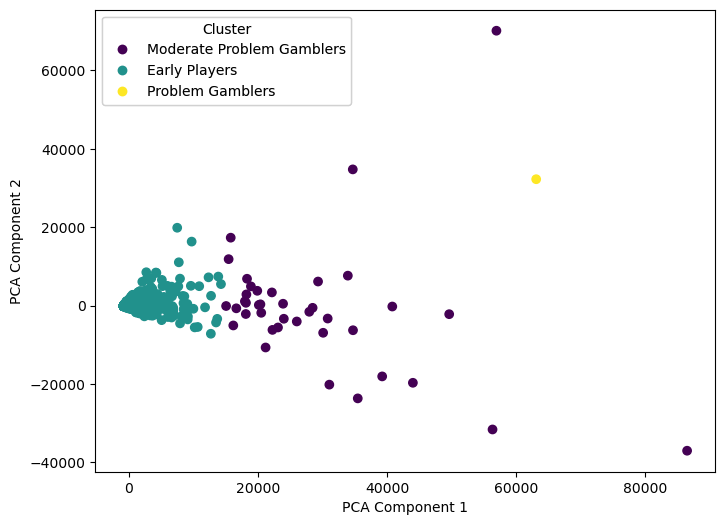

In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Pivot the DataFrame to create a 3D array with entries as rows, features as columns, and dates as depth
user_data_3d = filtered_df.pivot(index='UserID', columns='Aggregate_Date', values=['Turnover', 'Hold', 'NumberofBets','Age_until_2010', 'Interventiontype_first'])

# Fill missing values with zeros (if any)
user_data_3d = user_data_3d.fillna(0)

# Convert empty strings (' ') to float values of zero (0)
user_data_3d = user_data_3d.replace(' ', 0).astype(float)


user_data_3d = user_data_3d.astype(float)




# Convert the pivot table to a NumPy array
user_data_array = user_data_3d.to_numpy()

#k fold value
k = 3

# Perform K-means clustering
model = KMeans(n_clusters=k, random_state=0)
y_pred = model.fit_predict(user_data_array)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
user_data_pca = pca.fit_transform(user_data_array)


# Visualize the clustered entries using PCA components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(user_data_pca[:, 0], user_data_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')



    
cluster_dict={}

# Create a dictionary to store user IDs and cluster number
cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# Loop through the cluster labels and append user IDs to the corresponding cluster
for user_id, cluster_label in zip(user_data_3d.index, y_pred):
    cluster_dict[cluster_label]['users'].append(user_id)

# Print the user IDs and cluster number in each cluster
for cluster_label, info in cluster_dict.items():
    print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')
    
    
# Create a legend for the cluster numbers
legend_labels = ['Moderate Problem Gamblers','Early Players','Problem Gamblers']# [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)

plt.gca().add_artist(legend)

plt.show()


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method for Optimal K')

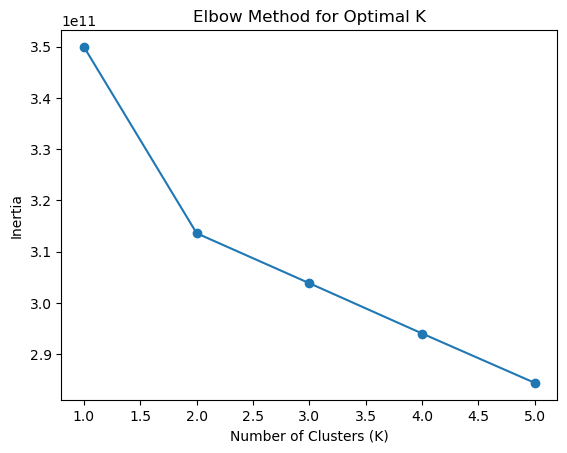

In [71]:
inertias = []
for k_value in range(1, 6):
    model = KMeans(n_clusters=k_value, random_state=0)
    model.fit(user_data_array)
    inertias.append(model.inertia_)

plt.plot(range(1, 6), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

In [20]:
user_data_3d_turnover = user_data_3d['Turnover']

# Create a new DataFrame to store the aggregated features
agguser_allfeature = pd.DataFrame()

#['Turnover', 'Hold', 'NumberofBets', 'YearofBirth', 'Interventiontype_first']

# Calculate the mean of each row and add it as a new column
agguser_allfeature['Mean_Turnover'] = user_data_3d_turnover.mean(axis=1)
agguser_allfeature['Mean_Hold'] = user_data_3d['Hold'].mean(axis=1)  
agguser_allfeature['Mean_NumberofBets'] = user_data_3d['NumberofBets'].mean(axis=1)  
agguser_allfeature['Mean_YearofBirth'] = user_data_3d['Age_until_2010'].mean(axis=1)  
agguser_allfeature['Mean_Interventiontype_first'] = user_data_3d['Interventiontype_first'].mean(axis=1)
agguser_allfeature['Cluster'] = y_pred


# Set the index of agguser_allfeaturue to match user_data_3d_turnover
agguser_allfeature.index = user_data_3d_turnover.index.tolist()

# Display the updated DataFrame
print(agguser_allfeature)




         Mean_Turnover  Mean_Hold  Mean_NumberofBets  Mean_YearofBirth  \
31965        29.325776   4.097601           3.243651         12.808167   
32639         0.001836   0.001836           0.000343          0.014070   
36822         0.008236  -0.008476           0.002059          0.027454   
36916         0.027111   0.027111           0.001030          0.028140   
74438         0.383665   0.150206           0.008236          0.180165   
...                ...        ...                ...               ...   
9806890       0.028240  -0.000159           0.002745          0.009952   
9807483       0.102132  -0.015731           0.003775          0.009266   
9820476       0.030298  -0.001102           0.001030          0.008579   
9822065       0.107430   0.016380           0.058339          0.354839   
9859152       0.004461   0.004461           0.001716          0.009609   

         Mean_Interventiontype_first  Cluster  
31965                       2.627316        1  
32639          

In [72]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(user_data_array, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9102540463620297


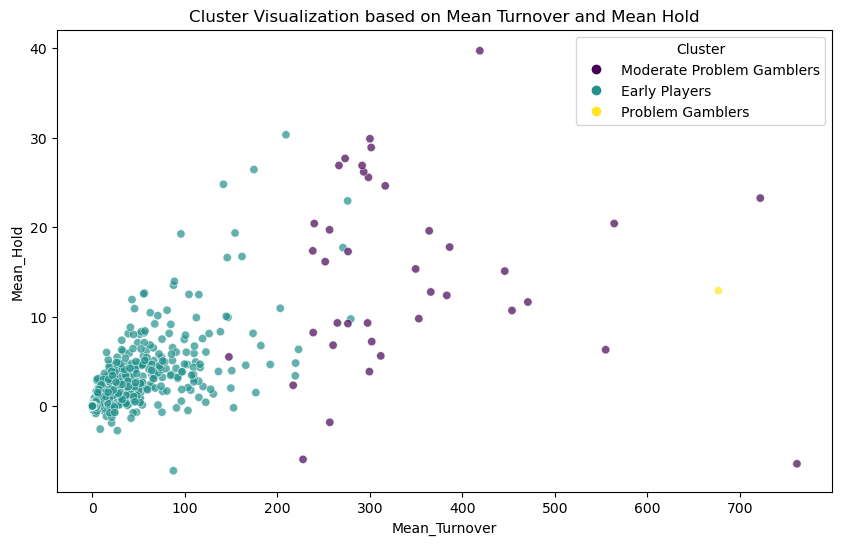

In [21]:
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Cast the index to integers
agguser_allfeature.index = agguser_allfeature.index.astype(int)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agguser_allfeature, x='Mean_Turnover', y='Mean_Hold', hue='Cluster', palette='viridis', alpha=0.7)
plt.xlabel('Mean_Turnover')
plt.ylabel('Mean_Hold')
plt.title('Cluster Visualization based on Mean Turnover and Mean Hold')
#plt.legend(title='Cluster', loc='upper right')
legend_labels = ['Moderate Problem Gamblers','Early Players','Problem Gamblers']# [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)


plt.show()

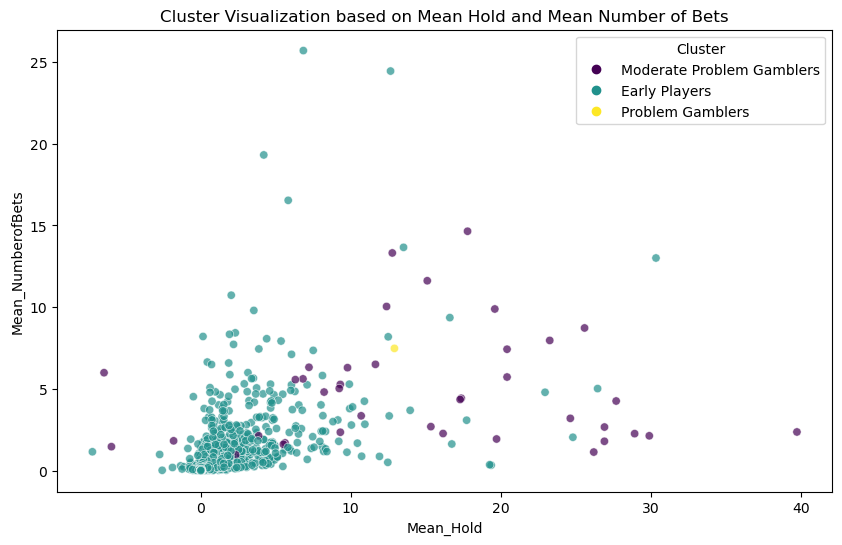

In [22]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agguser_allfeature, x='Mean_Hold', y='Mean_NumberofBets', hue='Cluster', palette='viridis', alpha=0.7)
plt.xlabel('Mean_Hold')
plt.ylabel('Mean_NumberofBets')
plt.title('Cluster Visualization based on Mean Hold and Mean Number of Bets')
#plt.legend(title='Cluster', loc='upper right')
legend_labels = ['Moderate Problem Gamblers','Early Players','Problem Gamblers']# [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)

plt.show()

C:\Users\abhiv\AppData\Local\Temp\ipykernel_19452\1398724544.py:8: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  parallel_coordinates(agguser_allfeature, 'Cluster', colormap='viridis', alpha=0.7, color=custom_colors)
C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


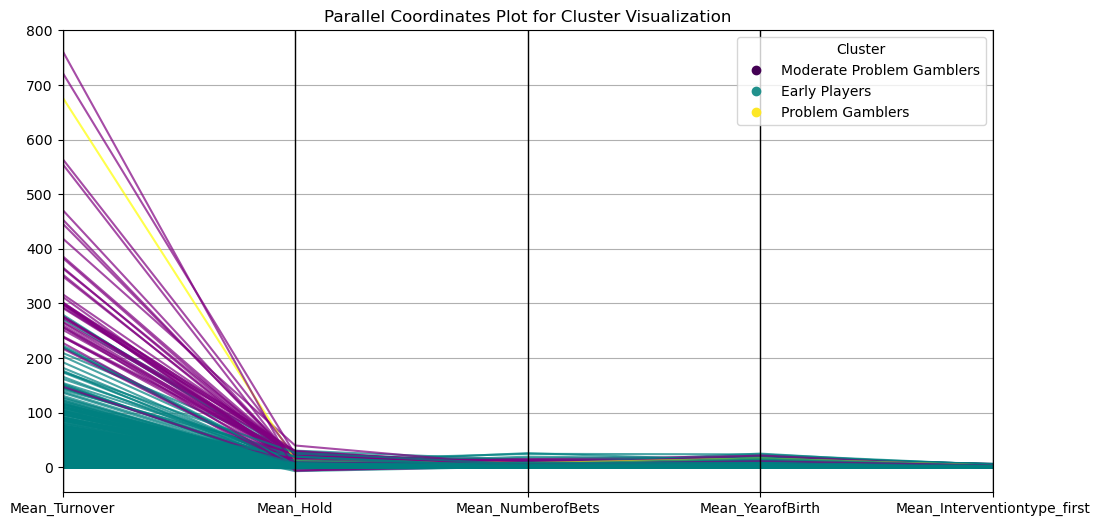

In [23]:
from pandas.plotting import parallel_coordinates

# Define custom colors for each cluster
custom_colors = [ 'teal','purple', 'yellow']

# Create a parallel coordinates plot with custom colors
plt.figure(figsize=(12, 6))
parallel_coordinates(agguser_allfeature, 'Cluster', colormap='viridis', alpha=0.7, color=custom_colors)
plt.title('Parallel Coordinates Plot for Cluster Visualization')

# Add a custom legend
legend_labels = ['Moderate Problem Gamblers','Early Players','Problem Gamblers']# [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)

plt.show()


In [49]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from ipywidgets import interact

from ipywidgets import interact, DatePicker



# Create a function to plot the clustering results for a specific time frame
def plot_clusters(time_frame):
    print(time_frame)
    start_date = '2002-11-12' #).date()
        # Extract the year from the time_frame and construct a new start_date
    start_year = str(int(time_frame))
    start_date = pd.to_datetime(start_year + '-11-12')
    
    plt.figure(figsize=(8, 6))
    plt.scatter(user_data_3d['NumberofBets'][start_date], user_data_3d['Hold'][start_date], c=y_pred, cmap='viridis')
   # plt.scatter(user_data_array[:, 0], user_data_array[:, 2], c=y_pred, cmap='viridis')
    plt.xlabel('NumberofBets')
    plt.ylabel('Hold')
    plt.title(f'K-means Clustering: NumberofBets vs Hold (Time Frame {time_frame})')
    
   
    # filtered_data_array = user_data_array[time_frame_condition]
    # filtered_y_pred = y_pred[time_frame_condition]
    
    # Scatter plot the filtered data
    # plt.scatter(filtered_data_array[:, 0], filtered_data_array[:, 2], c=filtered_y_pred, cmap='viridis')
    
    plt.show()
    

start_date='2002-11-12'
end_date='2010-11-10'




# Create the interaction using the date pickers
interact(plot_clusters, time_frame=(2002, 2009))

interactive(children=(IntSlider(value=2005, description='time_frame', max=2009, min=2002), Output()), _dom_cla…

<function __main__.plot_clusters(time_frame)>

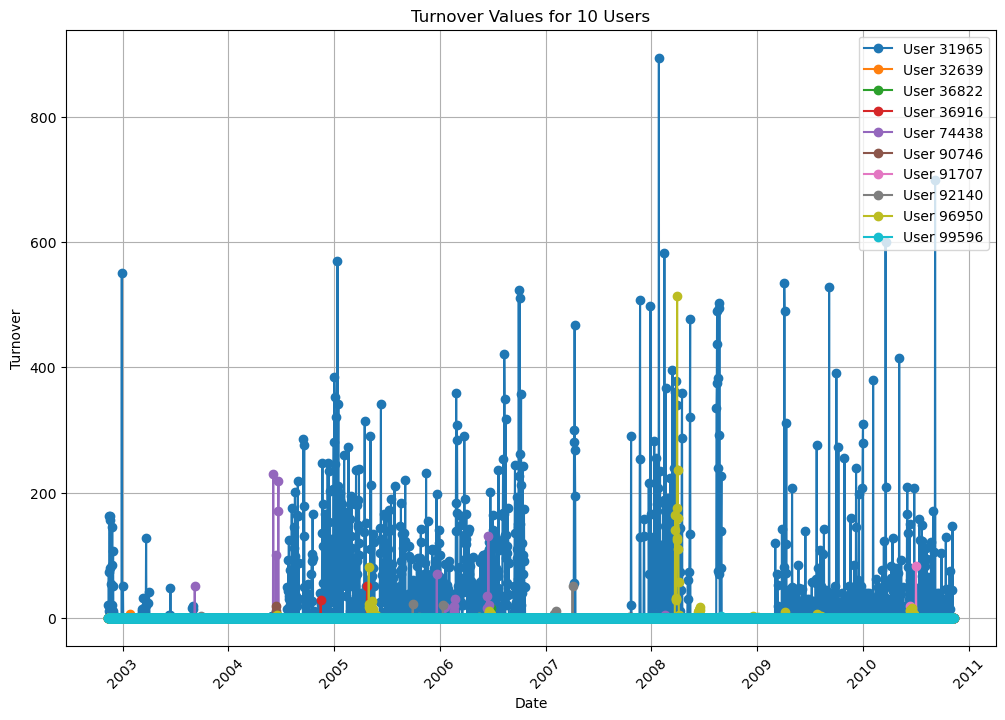

In [25]:
import matplotlib.pyplot as plt

# List of 10 user IDs to plot
user_ids_to_plot = [31965, 32639, 36822, 36916, 74438, 90746, 91707, 92140, 96950, 99596] 

# Create a subplot for the graph
plt.figure(figsize=(12, 8))
plt.title('Turnover Values for 10 Users')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.grid(True)

for user_id in user_ids_to_plot:
    
#     user_data_for_user1 = user_data_3d.loc[user_id, 'Turnover']

# # Extract the turnover values
# turnover_values = user_data_for_user1.to_numpy()

# # Extract the corresponding date indices
# dates = user_data_for_user1.index.get_level_values('Aggregate_Date')

    
    
    user_data_for_user = user_data_3d.loc[user_id, 'Turnover']
    
    # Extract the turnover values
    turnover_values = user_data_for_user.to_numpy()
    
    # Extract the corresponding date indices
    dates = user_data_for_user.index.get_level_values('Aggregate_Date')
    
    # Plot the turnover values against dates
    plt.plot(dates, turnover_values, marker='o', linestyle='-', label=f'User {user_id}')

# Add a legend to differentiate the users
plt.legend(loc='upper right')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [26]:
user_data_3d

Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [27]:
# features to consider : turnover, hold , number of bets for time series prediction

In [28]:
moderate_pg_players= [868583, 1175809, 1411743, 1457496, 1486136, 1662632, 1679490, 1776178, 1790848, 1921204, 2070894, 2150296, 2155065, 2589710, 2704382, 2852203, 3669466, 3852889, 3904422, 3968386, 4006708, 4371320, 4394754, 4412550, 4495603, 4532357, 5106620, 5308271, 5488160, 5660719, 5678852, 5723033, 6158120, 6175402, 6239380, 6283338, 6709379, 6985339, 7192925,4754125]

count = len(moderate_pg_players)
print("Count of moderate addicted players:", count)


Count of moderate addicted players: 40


In [29]:
bv=user_data_3d['Hold'][user_data_3d.index == 868583]
bv.value_counts
#user_data_3d[user_data_3d['UserID']==868583]

<bound method DataFrame.value_counts of Aggregate_Date  2002-11-12  2002-11-13  2002-11-14  2002-11-15  2002-11-16  \
UserID                                                                       
868583                 0.0         0.0         0.0         0.0         0.0   

Aggregate_Date  2002-11-17  2002-11-18  2002-11-19  2002-11-20  2002-11-22  \
UserID                                                                       
868583                 0.0         0.0         0.0         0.0         0.0   

Aggregate_Date  ...  2010-11-01  2010-11-02  2010-11-03  2010-11-04  \
UserID          ...                                                   
868583          ...         0.0         0.0         0.0         0.0   

Aggregate_Date  2010-11-05  2010-11-06  2010-11-07  2010-11-08  2010-11-09  \
UserID                                                                       
868583                 0.0         0.0         0.0         0.0         0.0   

Aggregate_Date  2010-11-10  
UserID      

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a dictionary to store user IDs, their corresponding 'is_stationary' values, and 'hypothesis_test_result'
is_stationary_data = {'UserID': moderate_pg_players, 'is_stationary': [], 'hypothesis_test_result': []}

# Iterate through the list of user IDs
for user_id in moderate_pg_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d['Turnover'][user_data_3d.index == user_id].values.ravel()
    
    # Perform the ADF test for stationarity
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
        hypothesis_test_result = 'Reject Null Hypothesis'  # Stationarity is significant
    else:
        is_stationary = 0  # Not stationary
        hypothesis_test_result = 'Fail to Reject Null Hypothesis'  # Stationarity is not significant
    
    # Append the 'is_stationary' and 'hypothesis_test_result' values to the list
    is_stationary_data['is_stationary'].append(is_stationary)
    is_stationary_data['hypothesis_test_result'].append(hypothesis_test_result)

# Create a new DataFrame from the dictionary
is_stationary_df = pd.DataFrame(is_stationary_data)

# Print the new DataFrame
print(is_stationary_df)


     UserID  is_stationary          hypothesis_test_result
0    868583              1          Reject Null Hypothesis
1   1175809              1          Reject Null Hypothesis
2   1411743              1          Reject Null Hypothesis
3   1457496              1          Reject Null Hypothesis
4   1486136              1          Reject Null Hypothesis
5   1662632              1          Reject Null Hypothesis
6   1679490              1          Reject Null Hypothesis
7   1776178              1          Reject Null Hypothesis
8   1790848              1          Reject Null Hypothesis
9   1921204              1          Reject Null Hypothesis
10  2070894              1          Reject Null Hypothesis
11  2150296              1          Reject Null Hypothesis
12  2155065              1          Reject Null Hypothesis
13  2589710              1          Reject Null Hypothesis
14  2704382              1          Reject Null Hypothesis
15  2852203              1          Reject Null Hypothes

In [31]:
# Stationray for Hold feature

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a dictionary to store user IDs and their corresponding 'is_stationary' values
is_stationary_data = {'UserID': moderate_pg_players, 'is_stationary_hold': []}

# Iterate through the list of user IDs
for user_id in moderate_pg_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d['Hold'][user_data_3d.index == user_id].values.ravel()
    
    # Perform the ADF user_data_3d_timeseries_stationarity_check
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
    # Append the 'is_stationary' value to the list
    is_stationary_data['is_stationary_hold'].append(is_stationary)

# Create a new DataFrame from the dictionary
is_stationary_df['is_stationary_hold'] = is_stationary_data['is_stationary_hold']

# Print the new DataFrame
#print(is_stationary_df)


In [60]:
#NumberofBets

In [61]:
#'NumberofBets', 'YearofBirth', 'Interventiontype_first']

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a dictionary to store user IDs and their corresponding 'is_stationary' values
is_stationary_data = {'UserID': moderate_pg_players, 'is_stationary_NumberofBets': []}

# Iterate through the list of user IDs
for user_id in moderate_pg_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d['NumberofBets'][user_data_3d.index == user_id].values.ravel()
    
    # Perform the ADF user_data_3d_timeseries_stationarity_check
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
    # Append the 'is_stationary' value to the list
    is_stationary_data['is_stationary_NumberofBets'].append(is_stationary)

# Create a new DataFrame from the dictionary
is_stationary_df['is_stationary_NumberofBets'] = is_stationary_data['is_stationary_NumberofBets']

# Print the new DataFrame
#print(is_stationary_df)


In [63]:
#YearofBirth


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a dictionary to store user IDs and their corresponding 'is_stationary' values
is_stationary_data = {'UserID': moderate_pg_players, 'is_stationary_Age_until_2010': []}

# Iterate through the list of user IDs
for user_id in moderate_pg_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d['Age_until_2010'][user_data_3d.index == user_id].values.ravel()
    
    # Perform the ADF user_data_3d_timeseries_stationarity_check
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
    # Append the 'is_stationary' value to the list
    is_stationary_data['is_stationary_Age_until_2010'].append(is_stationary)

# Create a new DataFrame from the dictionary
is_stationary_df['is_stationary_Age_until_2010'] = is_stationary_data['is_stationary_Age_until_2010']

# Print the new DataFrame
#print(is_stationary_df)


In [65]:
#Interventiontype_first

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a dictionary to store user IDs and their corresponding 'is_stationary' values
is_stationary_data = {'UserID': moderate_pg_players, 'is_stationary_Interventiontype_first': []}

# Iterate through the list of user IDs
for user_id in moderate_pg_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d['Interventiontype_first'][user_data_3d.index == user_id].values.ravel()
    
    # Perform the ADF user_data_3d_timeseries_stationarity_check
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
    # Append the 'is_stationary' value to the list
    is_stationary_data['is_stationary_Interventiontype_first'].append(is_stationary)

# Create a new DataFrame from the dictionary
is_stationary_df['is_stationary_Interventiontype_first'] = is_stationary_data['is_stationary_Interventiontype_first']

# Print the new DataFrame
#print(is_stationary_df)


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [67]:
is_stationary_df

UserID  is_stationary          hypothesis_test_result  \
0    868583              1          Reject Null Hypothesis   
1   1175809              1          Reject Null Hypothesis   
2   1411743              1          Reject Null Hypothesis   
3   1457496              1          Reject Null Hypothesis   
4   1486136              1          Reject Null Hypothesis   
5   1662632              1          Reject Null Hypothesis   
6   1679490              1          Reject Null Hypothesis   
7   1776178              1          Reject Null Hypothesis   
8   1790848              1          Reject Null Hypothesis   
9   1921204              1          Reject Null Hypothesis   
10  2070894              1          Reject Null Hypothesis   
11  2150296              1          Reject Null Hypothesis   
12  2155065              1          Reject Null Hypothesis   
13  2589710              1          Reject Null Hypothesis   
14  2704382              1          Reject Null Hypothesis   
15  2852203              1          Reject Null Hypothesis   
16  3669466              1          Reject Null Hypothesis   
17  3852889              1          Reject Null Hypothesis   
18  3904422              1          Reject Null Hypothesis   
19  3968386              1          Reject Null Hypothesis   
20  4006708              1          Reject Null Hypothesis   
21  4371320              1          Reject Null Hypothesis   
22  4394754              1          Reject Null Hypothesis   
23  4412550              1          Reject Null Hypothesis   
24  4495603              0  Fail to Reject Null Hypothesis   
25  4532357              1          Reject Null Hypothesis   
26  5106620              1          Reject Null Hypothesis   
27  5308271              1          Reject Null Hypothesis   
28  5488160              1          Reject Null Hypothesis   
29  5660719              1          Reject Null Hypothesis   
30  5678852              1          Reject Null Hypothesis   
31  5723033              1          Reject Null Hypothesis   
32  6158120              1          Reject Null Hypothesis   
33  6175402              1          Reject Null Hypothesis   
34  6239380              0  Fail to Reject Null Hypothesis   
35  6283338              1          Reject Null Hypothesis   
36  6709379              1          Reject Null Hypothesis   
37  6985339              1          Reject Null Hypothesis   
38  7192925              1          Reject Null Hypothesis   
39  4754125              1          Reject Null Hypothesis   

    is_stationary_hold  is_stationary_NumberofBets  \
0                    1                           1   
1                    1                           1   
2                    1                           1   
3                    1                           1   
4                    1                           1   
5                    1                           1   
6                    1                           1   
7                    1                           1   
8                    1                           1   
9                    1                           1   
10                   1                           1   
11                   1                           1   
12                   1                           1   
13                   1                           1   
14                   1                           1   
15                   1                           1   
16                   1                           1   
17                   1                           0   
18                   1                           1   
19                   1                           1   
20                   1                           1   
21                   1                           1   
22                   1                           1   
23                   1                           1   
24                   1                           1   
25                   1                           1   
26  

In [41]:
arimausers = is_stationary_df[(is_stationary_df['is_stationary'] == 1) & (is_stationary_df['is_stationary_hold'] == 1) & (is_stationary_df['is_stationary_NumberofBets'] == 1) &  (is_stationary_df['is_stationary_Age_until_2010'] == 1) & (is_stationary_df['is_stationary_Interventiontype_first'] == 1) ]
user_data_3d['Turnover']
x_single_user_turnover=user_data_3d['Turnover'][user_data_3d.index == arimausers['UserID'][1]] #[arimausers['UserID'][1]] 

In [42]:
arimausers.reset_index()#[x_single_user_turnover['UserID']=='800']

index   UserID  is_stationary  is_stationary_hold  \
0       0   868583              1                   1   
1       1  1175809              1                   1   
2       2  1411743              1                   1   
3       3  1457496              1                   1   
4       4  1486136              1                   1   
5       5  1662632              1                   1   
6       6  1679490              1                   1   
7       8  1790848              1                   1   
8       9  1921204              1                   1   
9      10  2070894              1                   1   
10     11  2150296              1                   1   
11     12  2155065              1                   1   
12     13  2589710              1                   1   
13     14  2704382              1                   1   
14     15  2852203              1                   1   
15     16  3669466              1                   1   
16     19  3968386              1                   1   
17     20  4006708              1                   1   
18     22  4394754              1                   1   
19     25  4532357              1                   1   
20     26  5106620              1                   1   
21     28  5488160              1                   1   
22     29  5660719              1                   1   
23     30  5678852              1                   1   
24     31  5723033              1                   1   
25     33  6175402              1                   1   
26     35  6283338              1                   1   
27     36  6709379              1                   1   
28     38  7192925              1                   1   
29     39  4754125              1                   1   

    is_stationary_NumberofBets  is_stationary_Age_until_2010  \
0                            1                             1   
1                            1                             1   
2                            1                             1   
3                            1                             1   
4                            1                             1   
5                            1                             1   
6                            1                             1   
7                            1                             1   
8                            1                             1   
9                            1                             1   
10                           1                             1   
11                           1                             1   
12                           1                             1   
13                           1                             1   
14                           1                             1   
15                           1                             1   
16                           1                             1   
17                           1                             1   
18                           1                             1   
19                           1                             1   
20                           1                             1   
21                           1                             1   
22                           1                             1   
23                           1                             1   
24                           1                             1   
25                           1                             1   
26                           1                             1   
27                           1                             1   
28                           1                             1   
29                           1                             1   

    is_stationary_Interventiontype_first  
0                                      1  
1                                      1  
2                                      1  
3                                      1  
4                                   

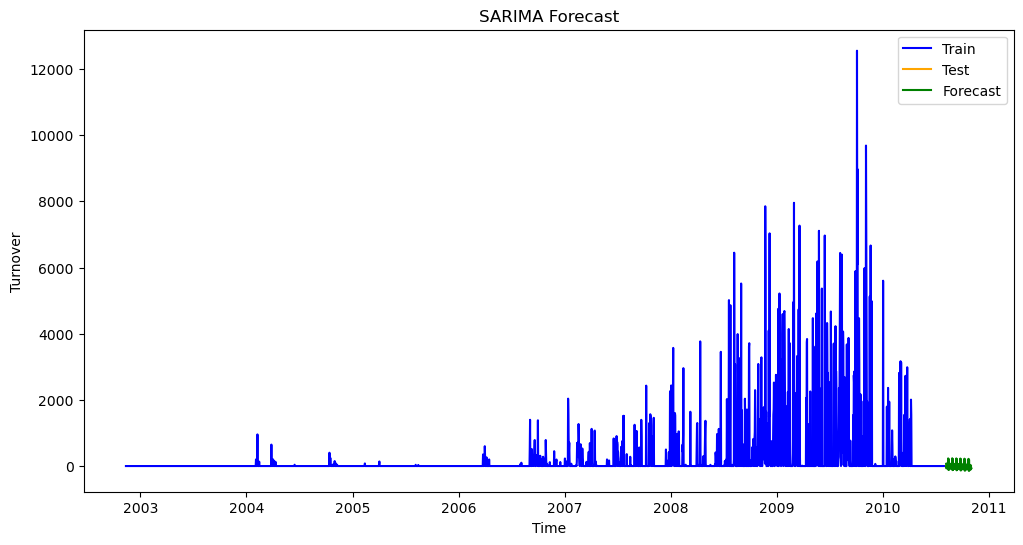

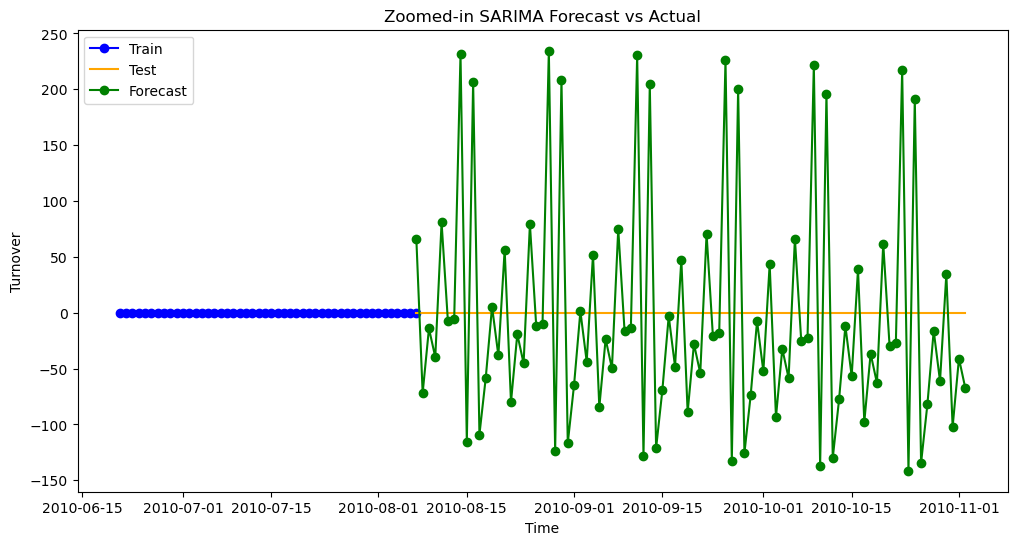

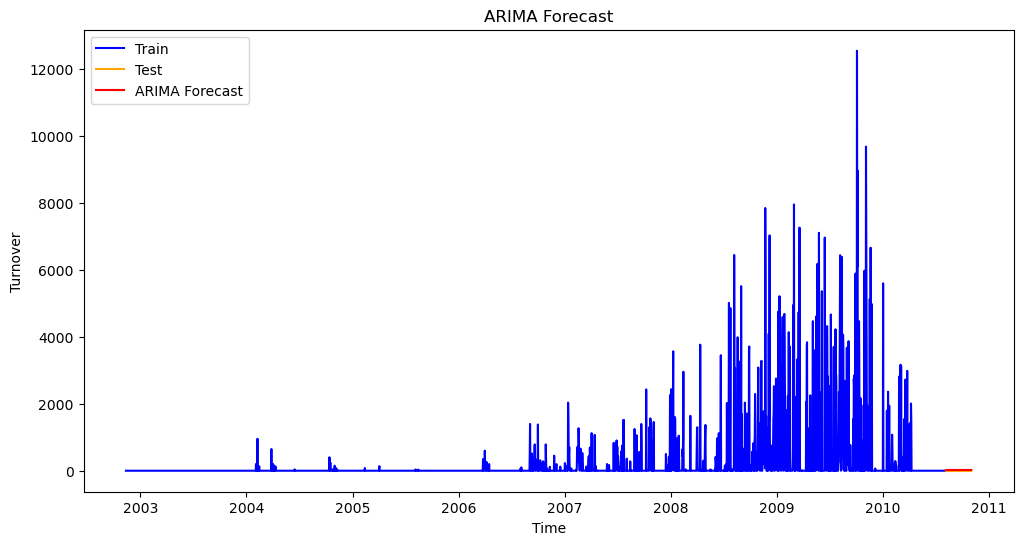

ARIMA Model Results (User 868583):
RMSE (ARIMA): 22.40285256300589
MAE (ARIMA): 22.396887663461186
User 868583:
SARIMAX RMSE : 102.5766159469979
SARIMAX MAE : 79.83388625079733
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-10 00:00:00
PG Detected right before: 2010-08-12 00:00:00
PG Detected right before: 2010-08-13 00:00:00
PG Detected right before: 2010-08-15 00:00:00
PG Detected right before: 2010-08-17 00:00:00
PG Detected right before: 2010-08-18 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-24 00:00:00
PG Detected right before: 2010-08-26 00:00:00
PG Detected right before: 2010-08-27 00:00:00
PG Detected right before: 2010-08-29 00:00:00
PG Detected right before: 2010-08-31 00:00:00
PG Detected right before: 2010-09-01 00:00:00
PG Detected right before: 2010-09-03 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-07 00:0

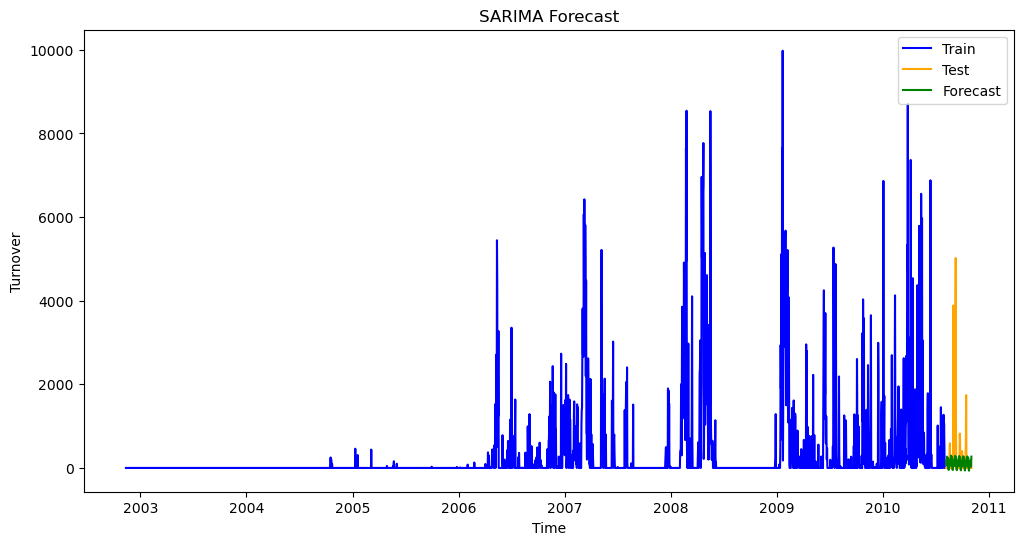

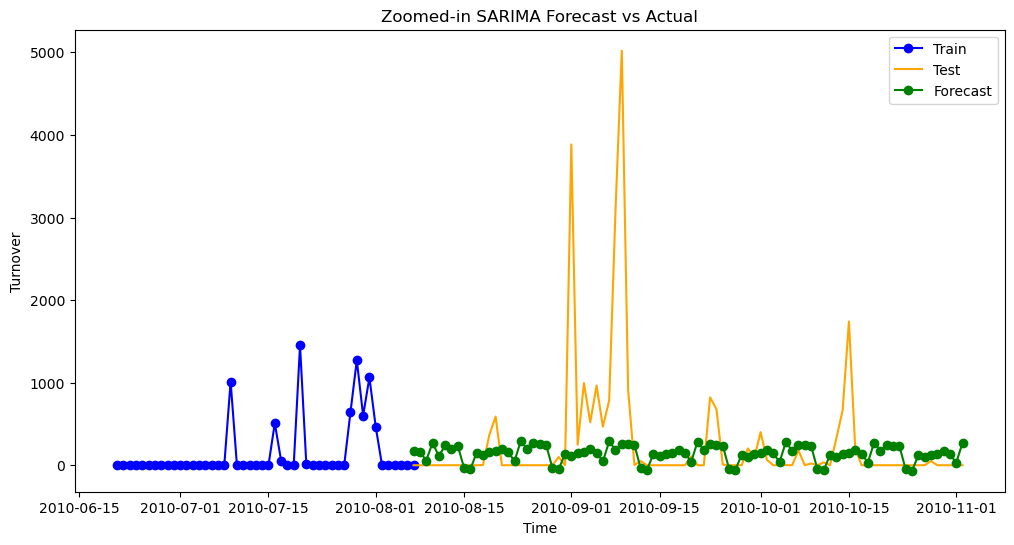

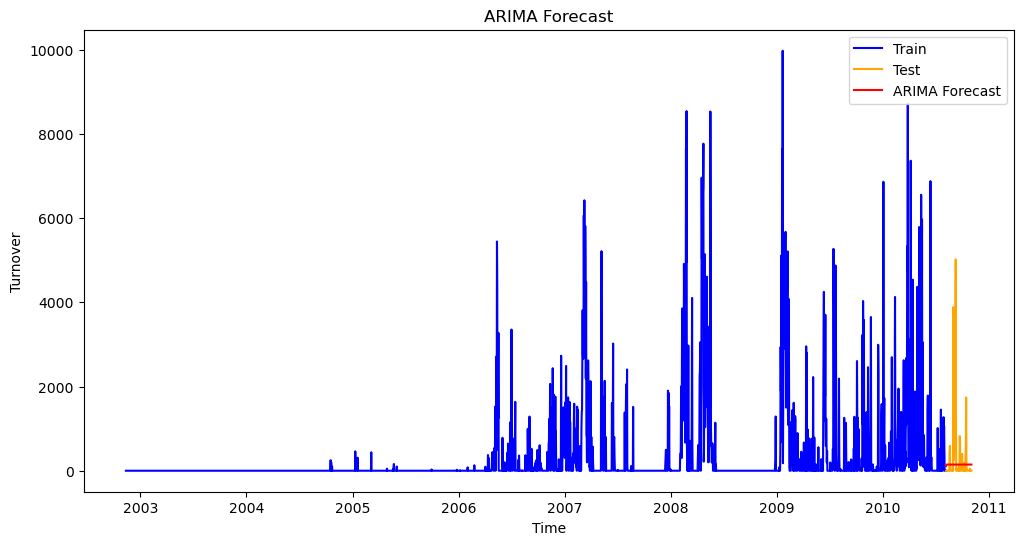

ARIMA Model Results (User 1175809):
RMSE (ARIMA): 784.7687886925128
MAE (ARIMA): 331.9608386066314
User 1175809:
SARIMAX RMSE : 777.9760114331281
SARIMAX MAE : 336.02694007952886
PG Detected right before: 2010-08-09 00:00:00
PG Detected right before: 2010-08-11 00:00:00
PG Detected right before: 2010-08-13 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-18 00:00:00
PG Detected right before: 2010-08-19 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-23 00:00:00
PG Detected right before: 2010-08-25 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-09-01 00:00:00
PG Detected right before: 2010-09-02 00:00:00
PG Detected right before: 2010-09-03 00:00:00
PG Detected right before: 2010-09-06 00:00:00
PG Detected right before: 2010-09-08 00:00:00
PG Detected right before: 2010-09-13 00:00:00
PG Detected right before: 2010-09-15 00:00:00
PG Detected right before: 2010-09-16 00

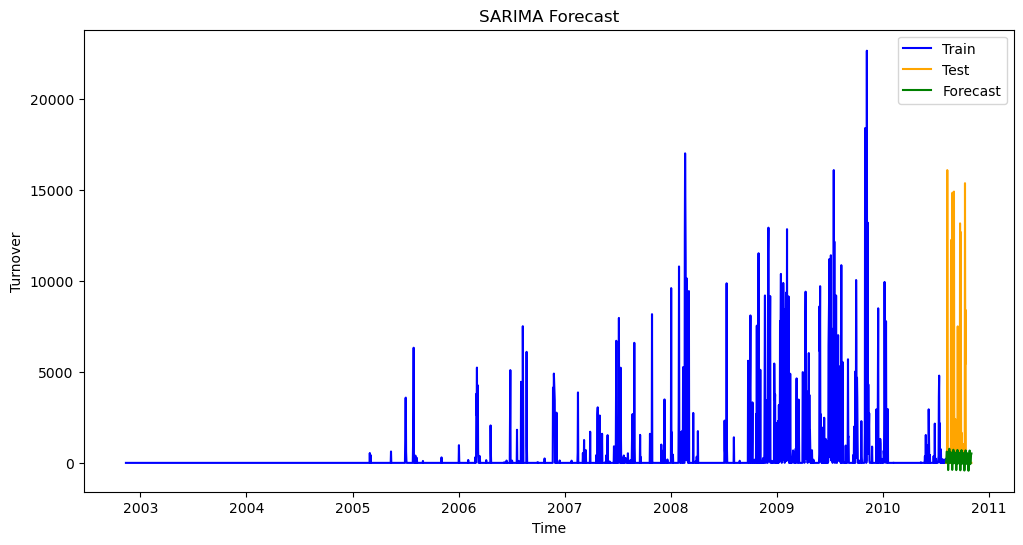

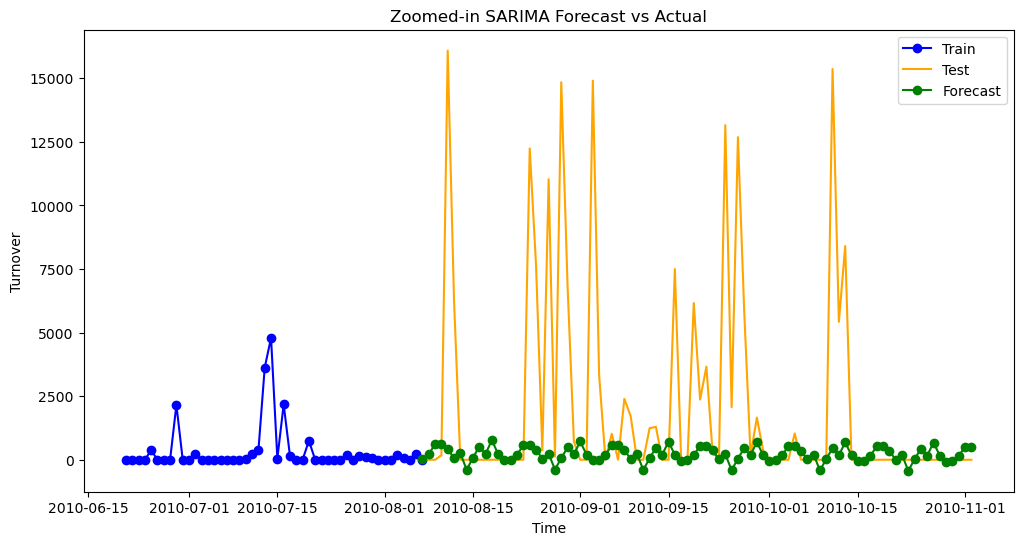

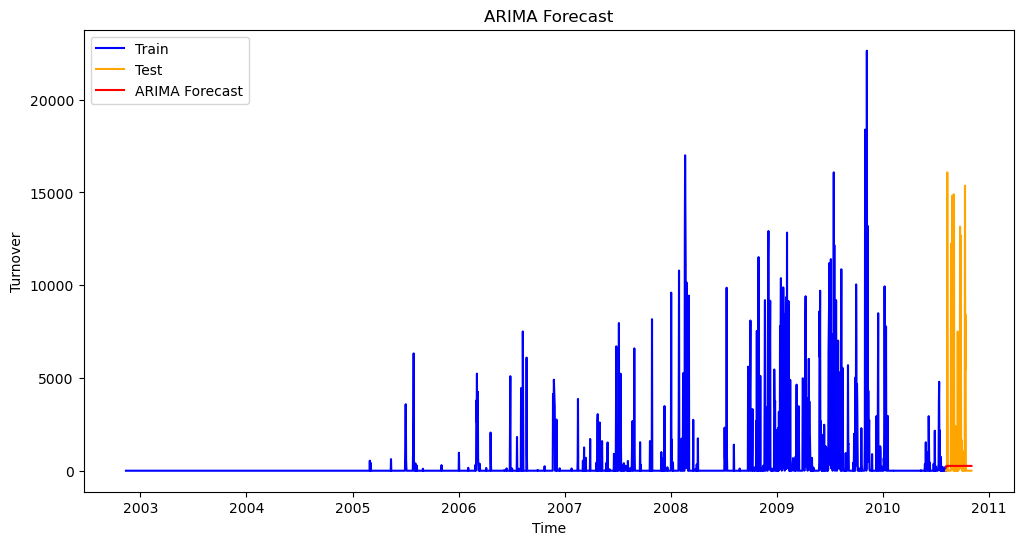

ARIMA Model Results (User 1411743):
RMSE (ARIMA): 4616.1579093677465
MAE (ARIMA): 2204.101215242136
User 1411743:
SARIMAX RMSE : 4613.733648122473
SARIMAX MAE : 2212.505857385308
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-12 00:00:00
PG Detected right before: 2010-08-14 00:00:00
PG Detected right before: 2010-08-15 00:00:00
PG Detected right before: 2010-08-17 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-21 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-26 00:00:00
PG Detected right before: 2010-08-28 00:00:00
PG Detected right before: 2010-08-29 00:00:00
PG Detected right before: 2010-08-31 00:00:00
PG Detected right before: 2010-09-03 00:00:00
PG Detected right before: 2010-09-04 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-09 00:00:00
PG Detected right before: 2010-09-11 00:00:00
PG Detected right before: 2010-09-12 00

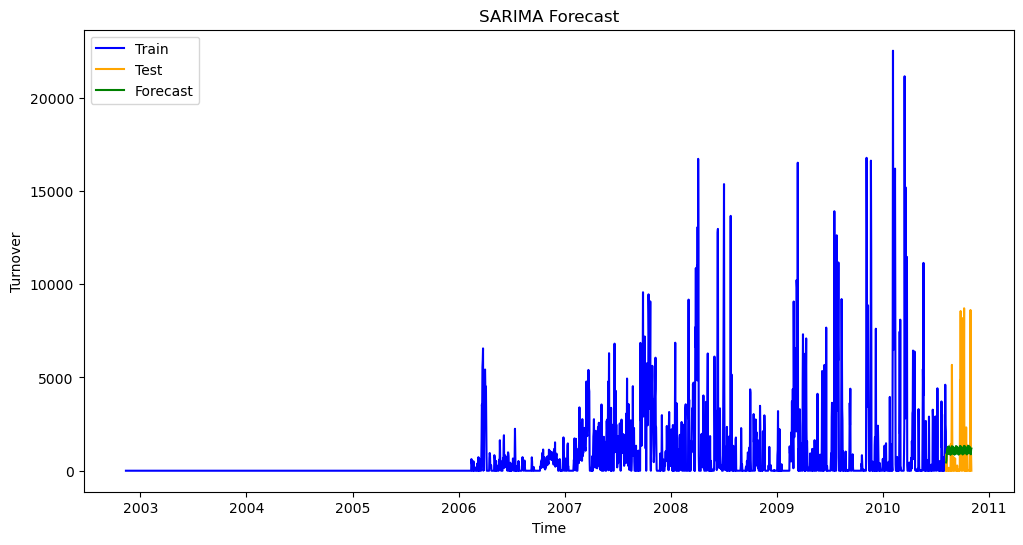

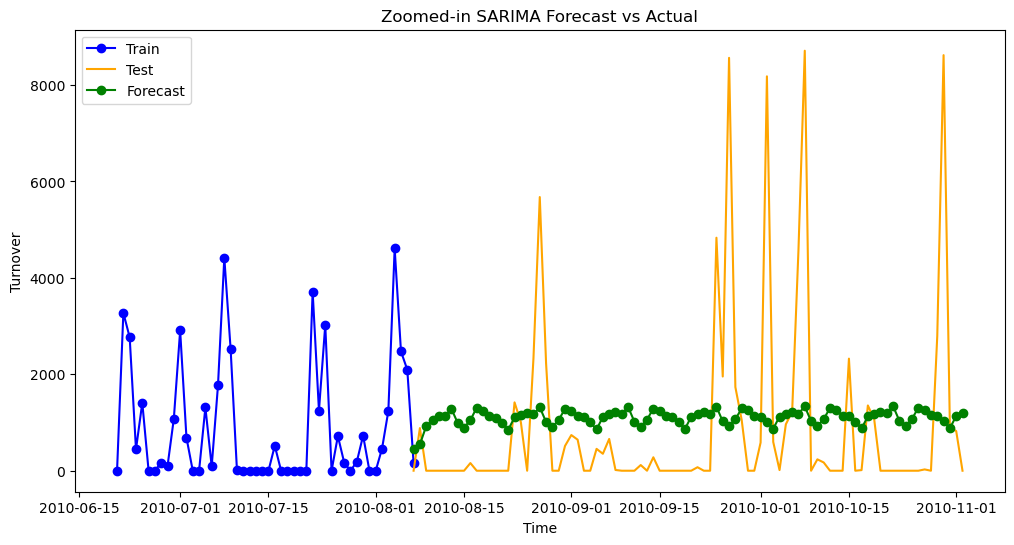

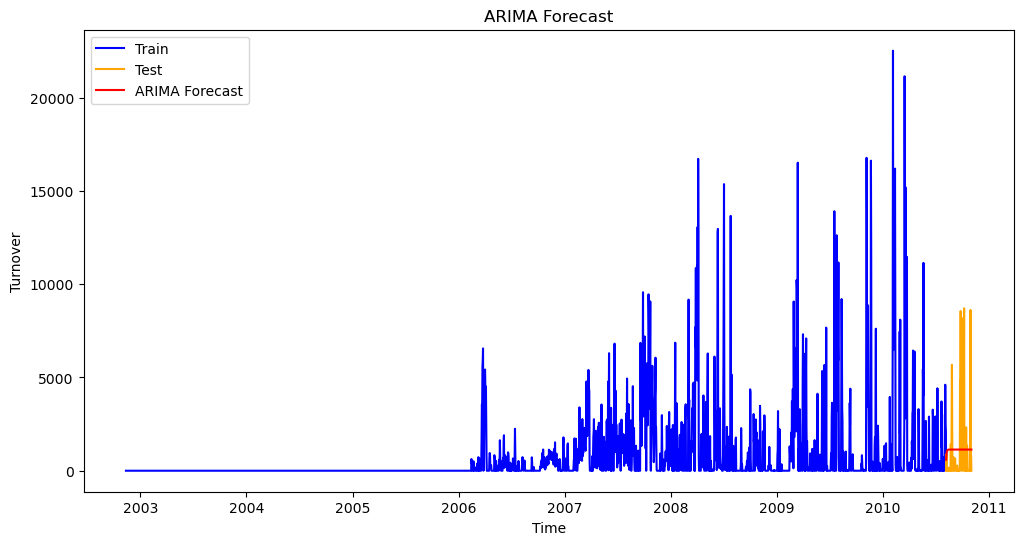

ARIMA Model Results (User 1457496):
RMSE (ARIMA): 1978.891627932139
MAE (ARIMA): 1324.9782438380369
User 1457496:
SARIMAX RMSE : 1977.6625563070231
SARIMAX MAE : 1313.9087263358097
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-09 00:00:00
PG Detected right before: 2010-08-10 00:00:00
PG Detected right before: 2010-08-12 00:00:00
PG Detected right before: 2010-08-15 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-23 00:00:00
PG Detected right before: 2010-08-24 00:00:00
PG Detected right before: 2010-08-26 00:00:00
PG Detected right before: 2010-08-29 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-06 00:00:00
PG Detected right before: 2010-09-07 00:00:00
PG Detected right before: 2010-09-09 00:00:00
PG Detected right before: 2010-09-12 00:00:00
PG Detected right before: 2010-09-13 

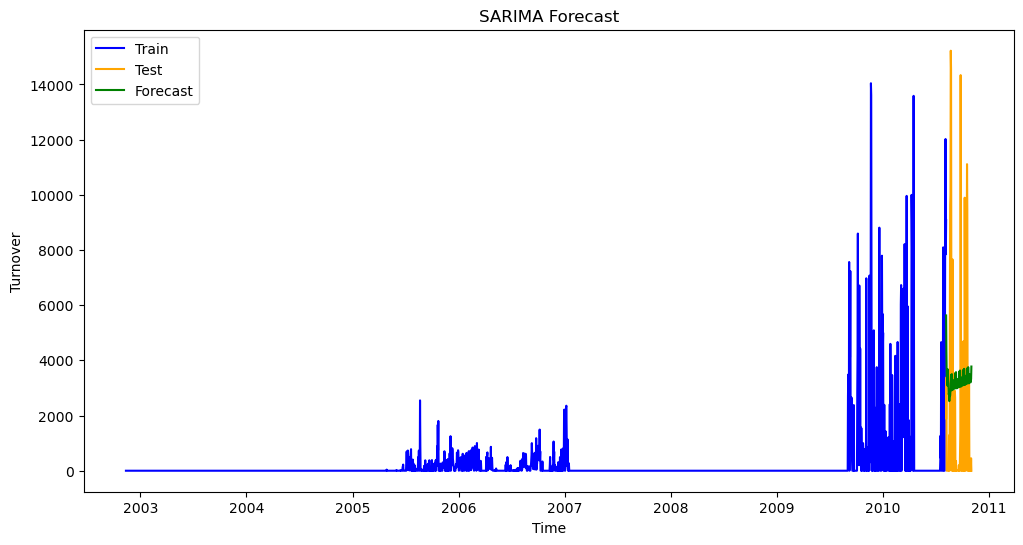

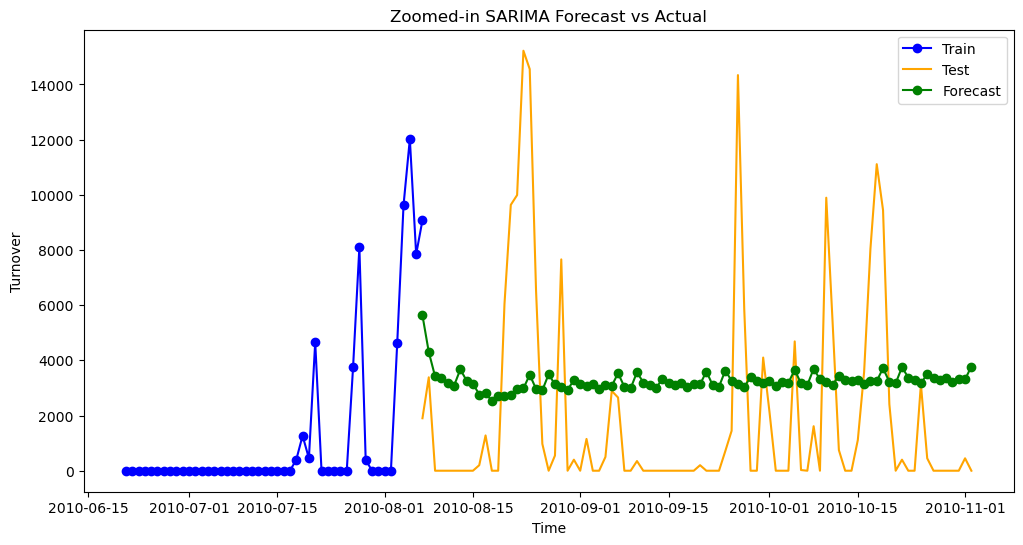

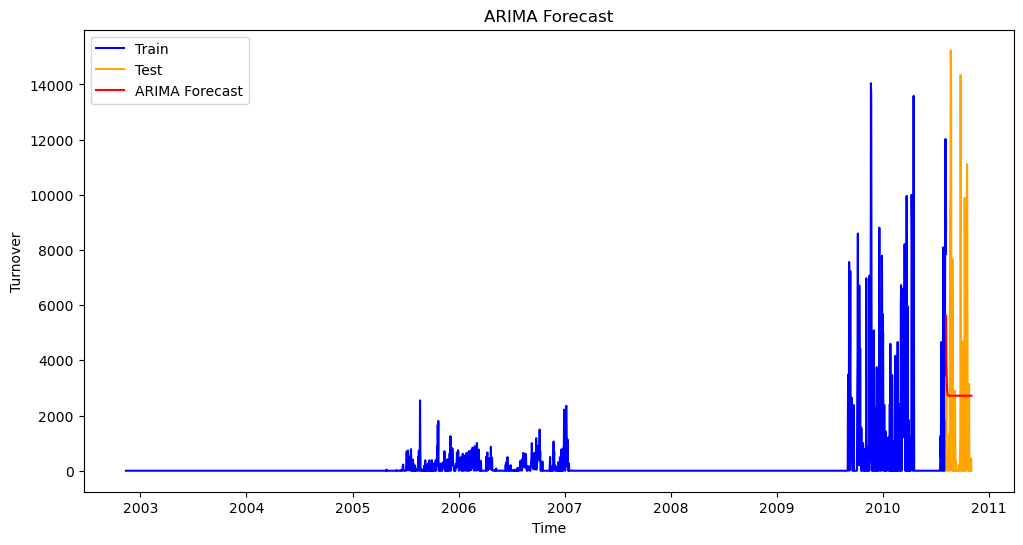

ARIMA Model Results (User 1486136):
RMSE (ARIMA): 3753.6733323996104
MAE (ARIMA): 3049.424238509906
User 1486136:
SARIMAX RMSE : 3891.2559967302295
SARIMAX MAE : 3338.0576744058267
PG Detected right before: 2010-08-12 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-18 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-21 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-23 00:00:00
PG Detected right before: 2010-08-26 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-09-02 00:00:00
PG Detected right before: 2010-09-04 00:00:00
PG Detected right before: 2010-09-06 00:00:00
PG Detected right before: 2010-09-09 00:00:00
PG Detected right before: 2010-09-13 00:00:00
PG Detected right before: 2010-09-16 00:00:00
PG Detected right before: 2010-09-18 00:00:00
PG Detected right before: 2010-09-20 00:00:00
PG Detected right before: 2010-09-23 

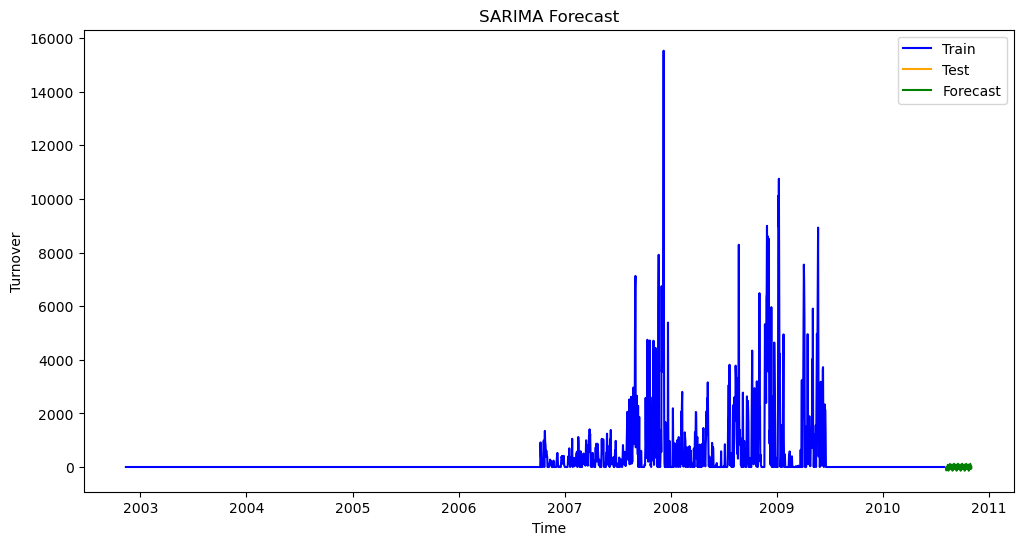

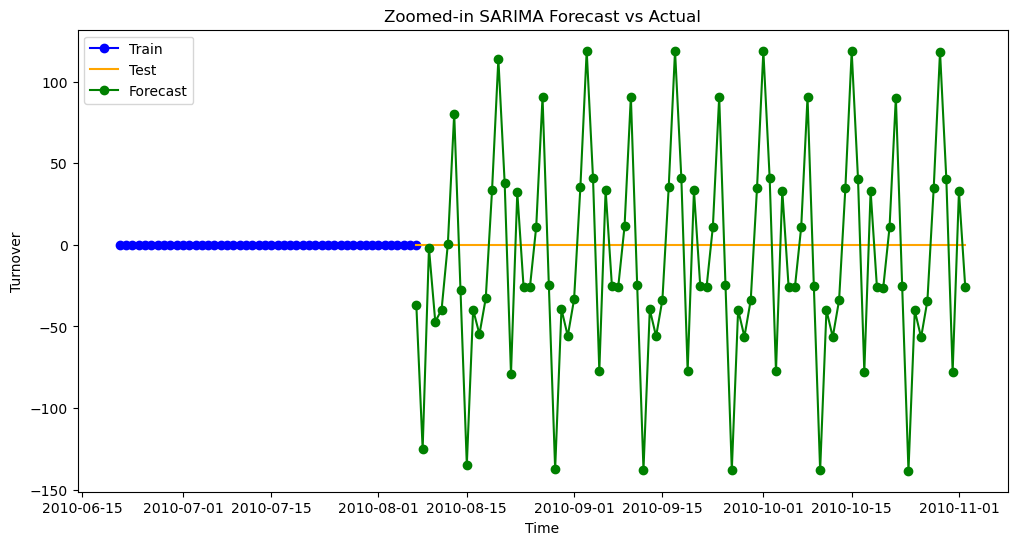

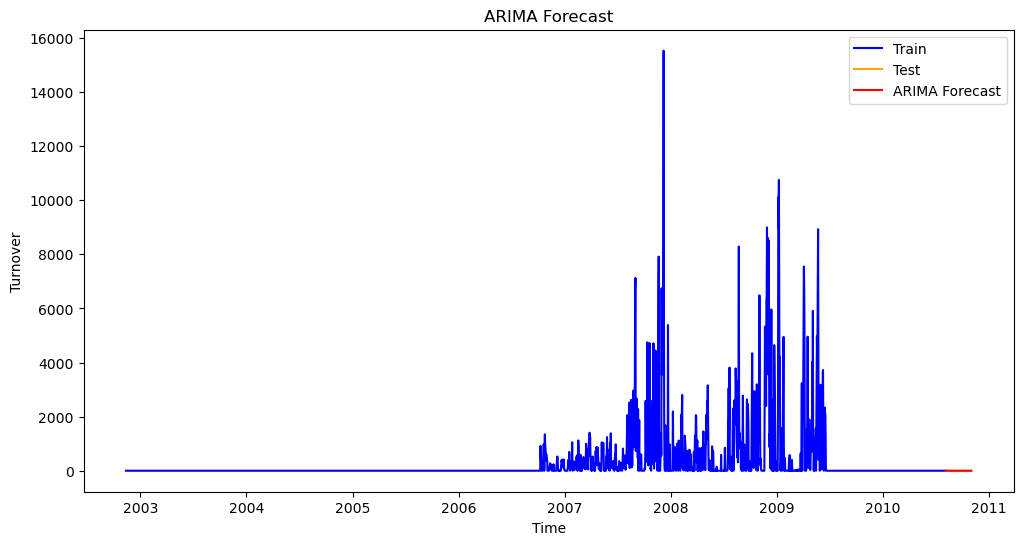

ARIMA Model Results (User 1662632):
RMSE (ARIMA): 0.34753857826167966
MAE (ARIMA): 0.3459736756983271
User 1662632:
SARIMAX RMSE : 65.0293645083209
SARIMAX MAE : 53.443114830836
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-10 00:00:00
PG Detected right before: 2010-08-11 00:00:00
PG Detected right before: 2010-08-12 00:00:00
PG Detected right before: 2010-08-15 00:00:00
PG Detected right before: 2010-08-17 00:00:00
PG Detected right before: 2010-08-18 00:00:00
PG Detected right before: 2010-08-19 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-25 00:00:00
PG Detected right before: 2010-08-26 00:00:00
PG Detected right before: 2010-08-29 00:00:00
PG Detected right before: 2010-08-31 00:00:00
PG Detected right before: 2010-09-01 00:00:00
PG Detected right before: 2010-09-02 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-08 00:00:00
PG Detected right before: 2010-09-09 00:

C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


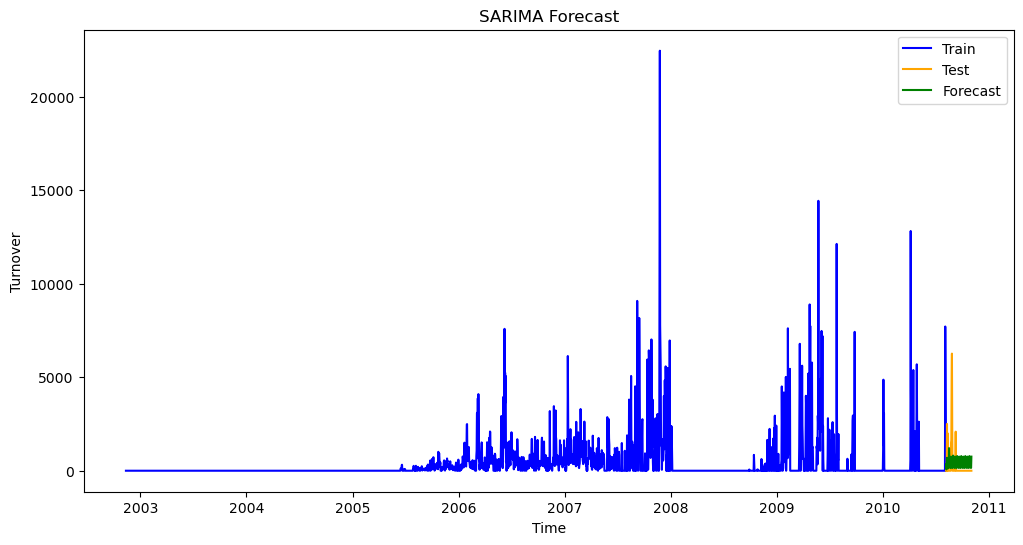

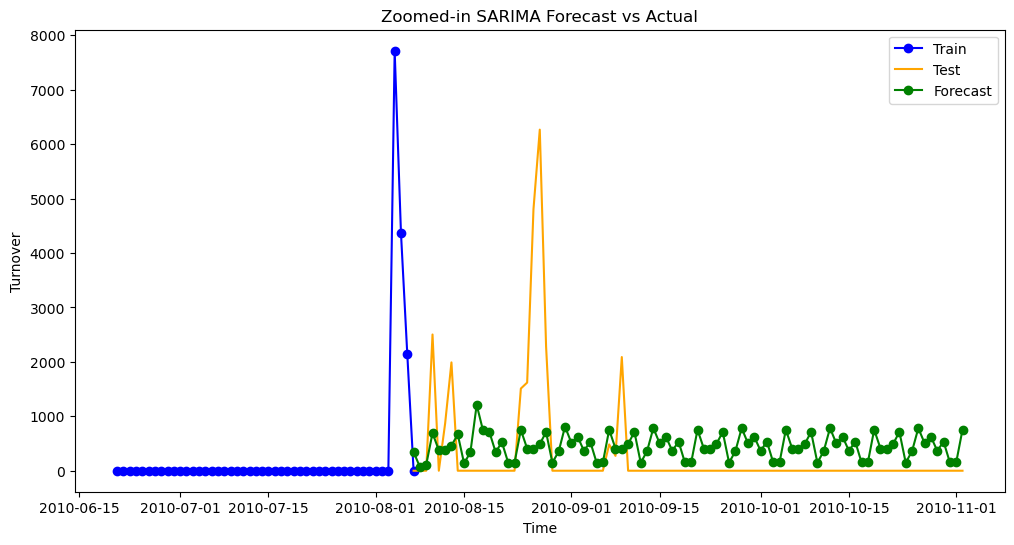

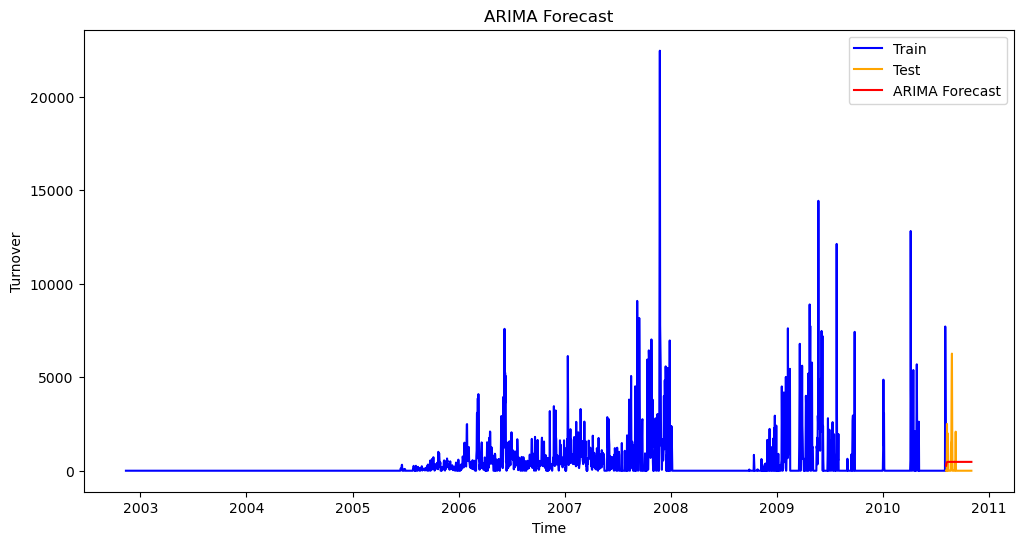

ARIMA Model Results (User 1679490):
RMSE (ARIMA): 978.1364539081785
MAE (ARIMA): 636.1494596739383
User 1679490:
SARIMAX RMSE : 985.5062523969005
SARIMAX MAE : 612.500708985471
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-09 00:00:00
PG Detected right before: 2010-08-11 00:00:00
PG Detected right before: 2010-08-12 00:00:00
PG Detected right before: 2010-08-13 00:00:00
PG Detected right before: 2010-08-15 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-23 00:00:00
PG Detected right before: 2010-08-26 00:00:00
PG Detected right before: 2010-08-27 00:00:00
PG Detected right before: 2010-08-29 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-09-01 00:00:00
PG Detected right before: 2010-09-03 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-06 00:0

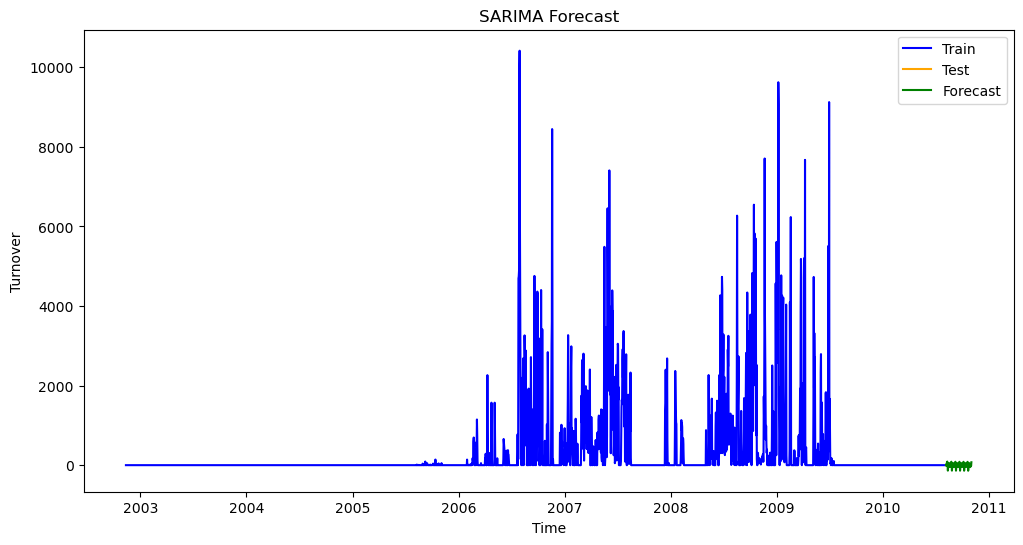

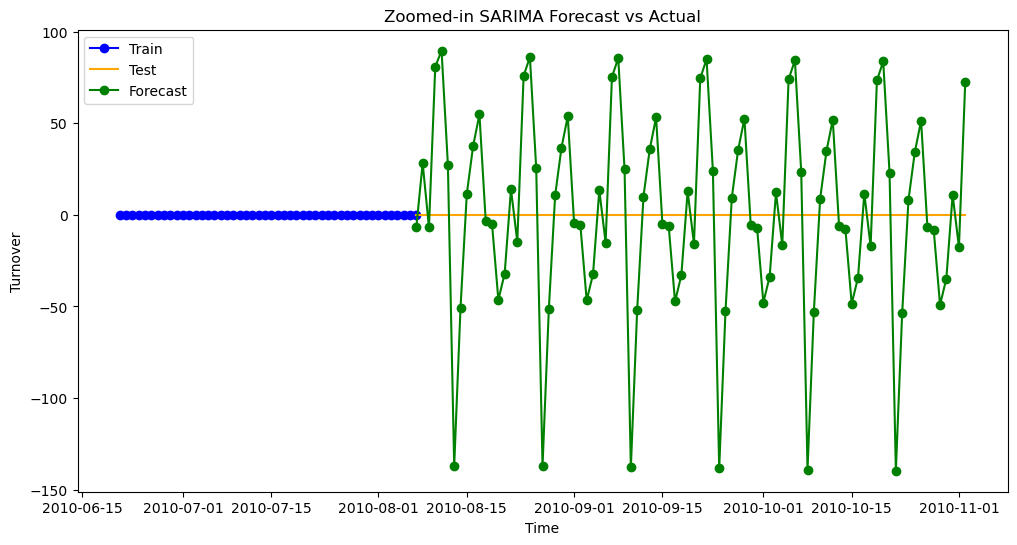

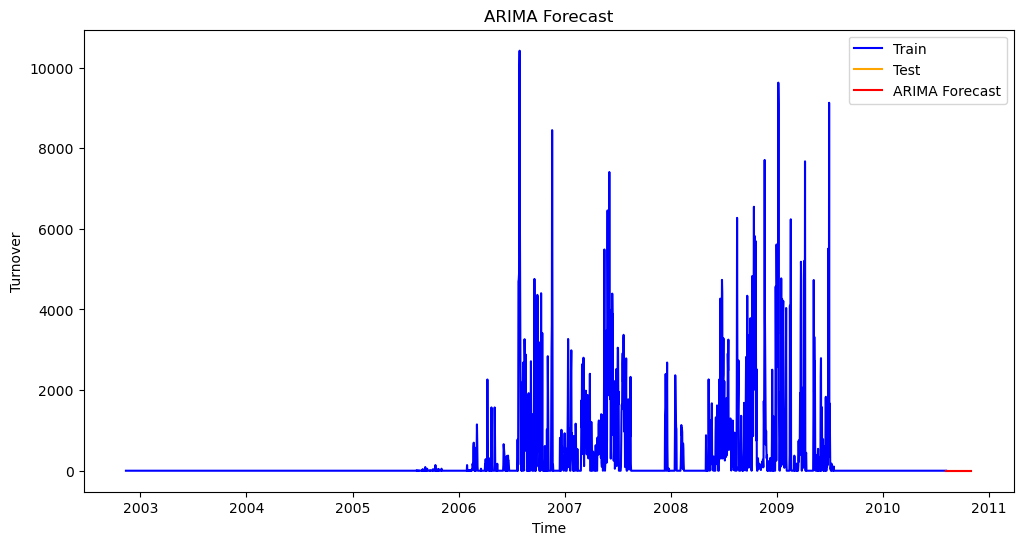

ARIMA Model Results (User 1790848):
RMSE (ARIMA): 0.0012906643653054297
MAE (ARIMA): 0.0012876457490887852
User 1790848:
SARIMAX RMSE : 55.19393943266972
SARIMAX MAE : 41.99327265944823
PG Detected right before: 2010-08-09 00:00:00
PG Detected right before: 2010-08-10 00:00:00
PG Detected right before: 2010-08-13 00:00:00
PG Detected right before: 2010-08-14 00:00:00
PG Detected right before: 2010-08-15 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-21 00:00:00
PG Detected right before: 2010-08-23 00:00:00
PG Detected right before: 2010-08-24 00:00:00
PG Detected right before: 2010-08-27 00:00:00
PG Detected right before: 2010-08-28 00:00:00
PG Detected right before: 2010-08-29 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-09-03 00:00:00
PG Detected right before: 2010-09-04 00:00:00
PG Detected right before: 2010-09-06 00:00:00
PG Detected right before: 2010-0

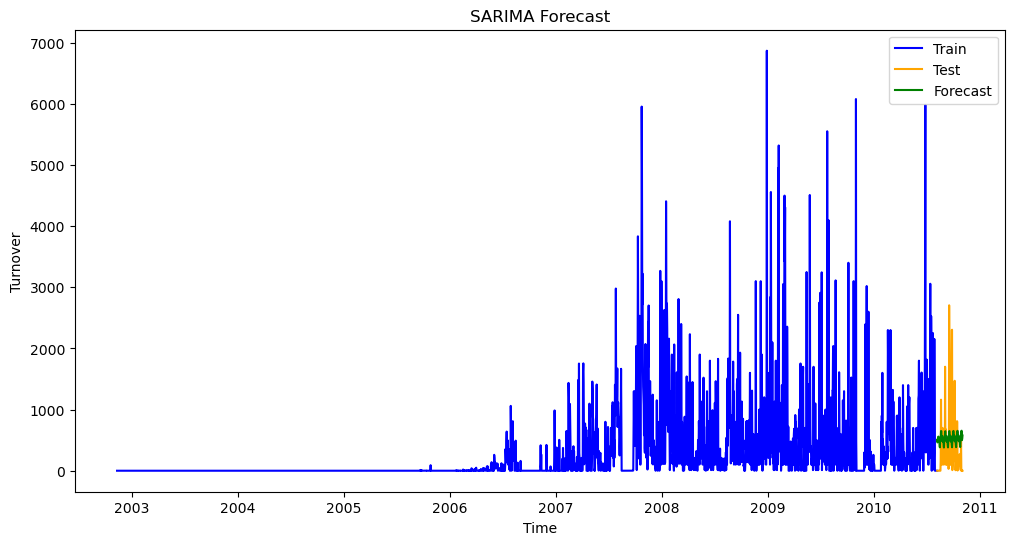

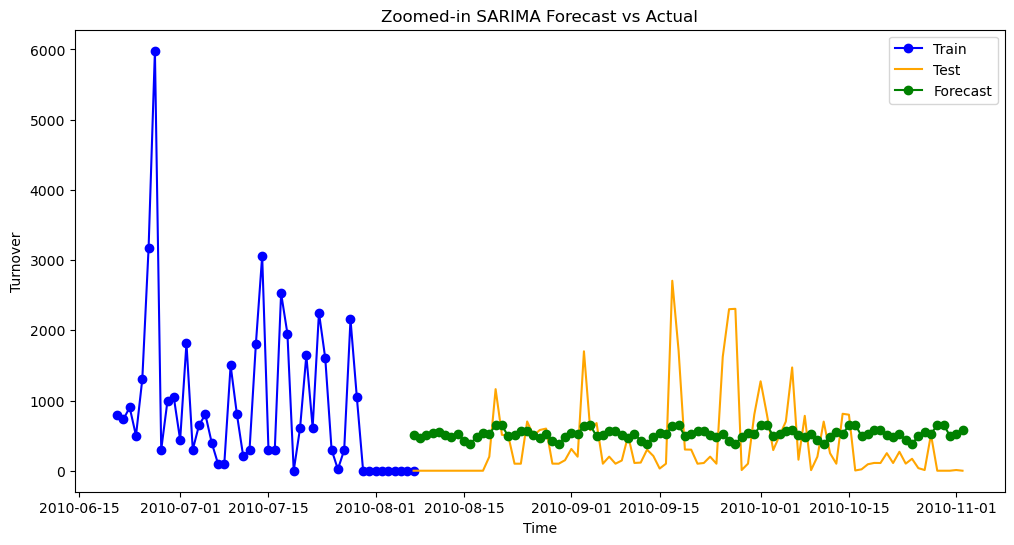

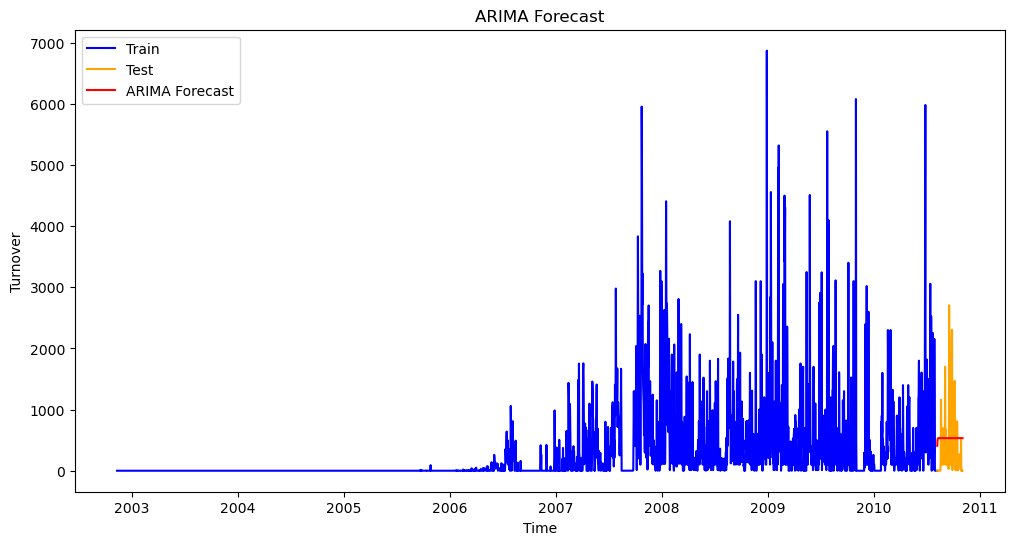

ARIMA Model Results (User 1921204):
RMSE (ARIMA): 573.9839527146021
MAE (ARIMA): 453.59999894681533
User 1921204:
SARIMAX RMSE : 564.2913244910224
SARIMAX MAE : 437.39373955004817
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-09 00:00:00
PG Detected right before: 2010-08-10 00:00:00
PG Detected right before: 2010-08-13 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-17 00:00:00
PG Detected right before: 2010-08-19 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-23 00:00:00
PG Detected right before: 2010-08-24 00:00:00
PG Detected right before: 2010-08-27 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-08-31 00:00:00
PG Detected right before: 2010-09-02 00:00:00
PG Detected right before: 2010-09-03 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-06 00:00:00
PG Detected right before: 2010-09-07 0

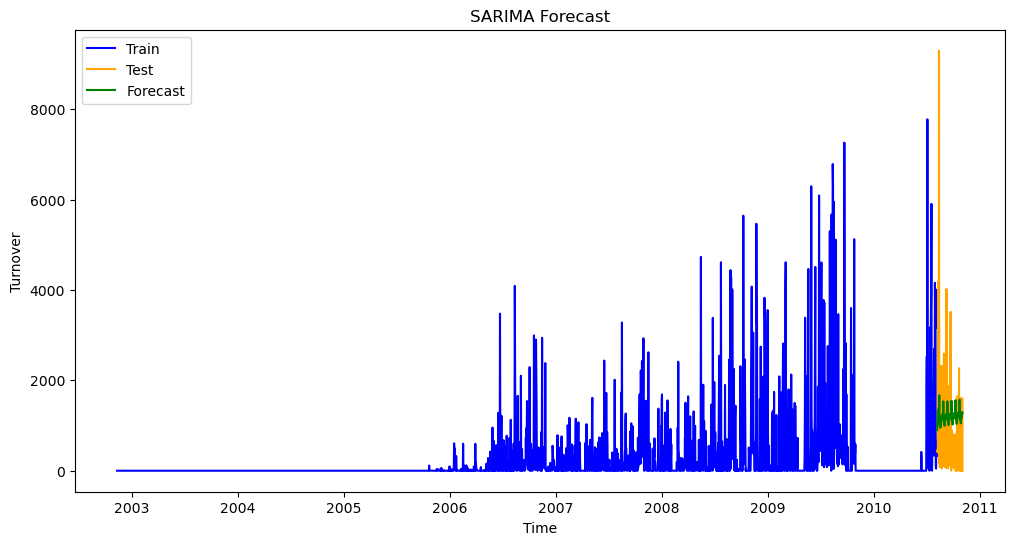

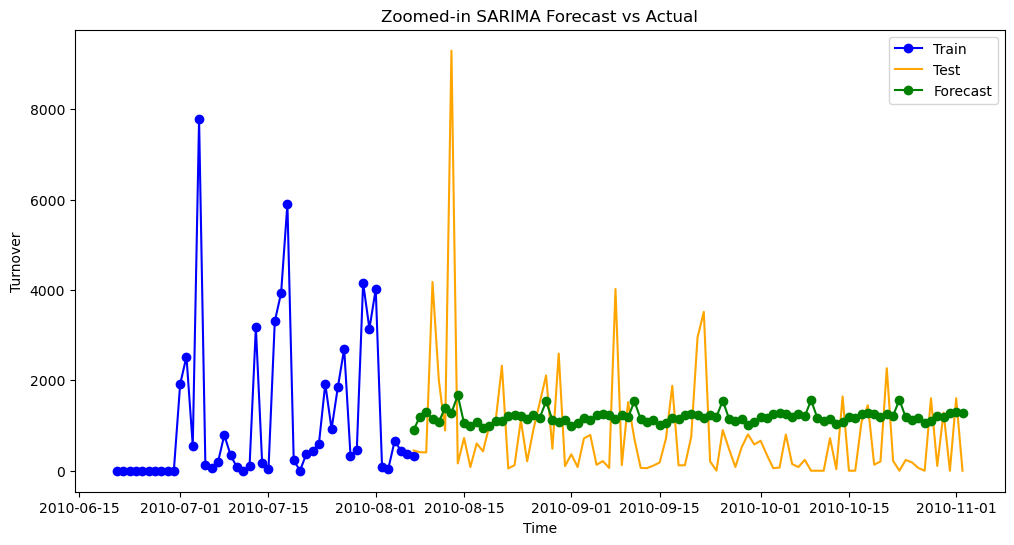

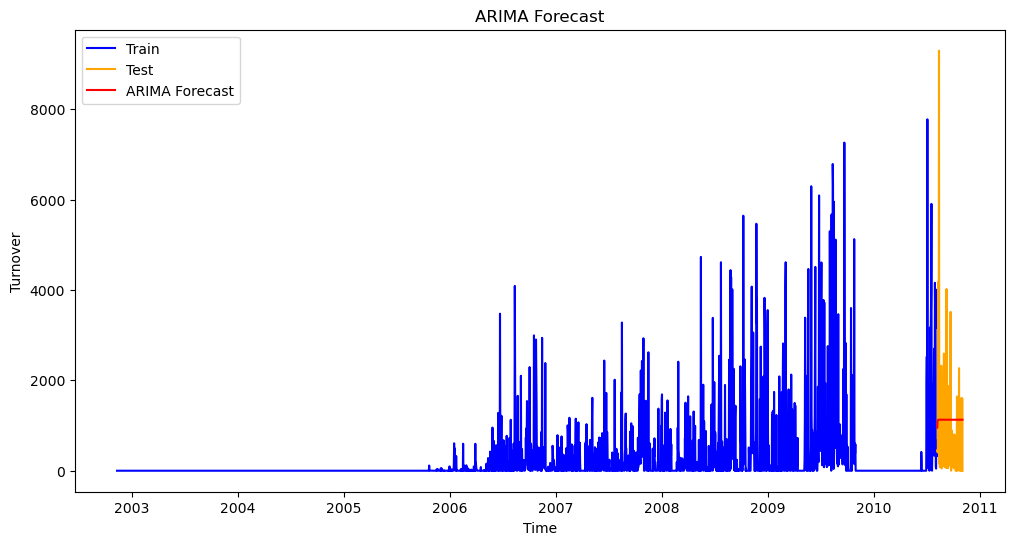

ARIMA Model Results (User 2070894):
RMSE (ARIMA): 1318.9026564972567
MAE (ARIMA): 939.9894409160116
User 2070894:
SARIMAX RMSE : 1338.5668002348875
SARIMAX MAE : 975.8631625342256
PG Detected right before: 2010-08-08 00:00:00
PG Detected right before: 2010-08-11 00:00:00
PG Detected right before: 2010-08-13 00:00:00
PG Detected right before: 2010-08-16 00:00:00
PG Detected right before: 2010-08-18 00:00:00
PG Detected right before: 2010-08-19 00:00:00
PG Detected right before: 2010-08-20 00:00:00
PG Detected right before: 2010-08-21 00:00:00
PG Detected right before: 2010-08-22 00:00:00
PG Detected right before: 2010-08-25 00:00:00
PG Detected right before: 2010-08-27 00:00:00
PG Detected right before: 2010-08-30 00:00:00
PG Detected right before: 2010-09-01 00:00:00
PG Detected right before: 2010-09-02 00:00:00
PG Detected right before: 2010-09-04 00:00:00
PG Detected right before: 2010-09-05 00:00:00
PG Detected right before: 2010-09-08 00:00:00
PG Detected right before: 2010-09-10 0

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA



# Loop through each user in arimausers
for user_id in arimausers['UserID'].head(10):
    x_single_user_turnover = user_data_3d['Turnover'][user_data_3d.index == user_id]
    x_single_user_turnover_ravel = x_single_user_turnover.values.ravel()

    

    frequency = 'D'  # Daily frequency

    start_date='2002-11-12'
    end_date='2010-11-10'



    # Create a time index for your data
    time_index = pd.date_range(start=start_date, periods=len(x_single_user_turnover_ravel), freq=frequency)


    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_single_user_turnover_ravel_scaled = scaler.fit_transform(x_single_user_turnover_ravel.reshape(-1, 1))

    # Split the data into training and test sets
    split_ratio = 0.97  # 80% for training, 20% for testing
    split_index = int(len(x_single_user_turnover_ravel) * split_ratio)

    train_data = x_single_user_turnover_ravel_scaled[:split_index]
    test_data = x_single_user_turnover_ravel_scaled[split_index:]


    # Create a time index for your data
    time_index_train = pd.date_range(start=start_date, periods=len(train_data), freq=frequency)


    # Create a time index for your data
    time_index_test = pd.date_range(start=time_index_train[-1], periods=len(test_data), freq=frequency)

    
    
    #ARIMA 
    
    
    # Define the ARIMA model
    model_arima = ARIMA(train_data, order=(1, 1, 1))

    # Fit the ARIMA model to the training data
    FITmodel_arima = model_arima.fit()

    # Forecast the test series using ARIMA
    FITmodel_arima_forecast = FITmodel_arima.predict(start=split_index, end=len(x_single_user_turnover_ravel) - 1)

    # Inverse scale the ARIMA forecasted values
    FITmodel_arima_forecast = scaler.inverse_transform(FITmodel_arima_forecast.reshape(-1, 1)).reshape(-1)

    

    # Define the SARIMA model with seasonal difference and order
    model_sarima_monthly = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 14))

    # Fit the model to the training data
    FITmodel_sarima_monthly = model_sarima_monthly.fit()

    # Forecast the test series
    FITmodel_sarima_monthly_forecast = FITmodel_sarima_monthly.forecast(steps=len(test_data))

    # Inverse scale the forecasted values
    FITmodel_sarima_monthly_forecast = scaler.inverse_transform(FITmodel_sarima_monthly_forecast.reshape(-1, 1)).reshape(-1)

    # Inverse scale the training data
    train_data_inverse = scaler.inverse_transform(train_data.reshape(-1, 1)).reshape(-1)

    # Inverse scale the test data
    test_data_inverse = scaler.inverse_transform(test_data.reshape(-1, 1)).reshape(-1)

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(time_index_train, train_data_inverse, label='Train', color='blue')
    forecast_dates = pd.date_range(start=time_index_train[-1], periods=len(test_data), freq=frequency)  # Adjust as needed
    plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
    plt.plot(forecast_dates, FITmodel_sarima_monthly_forecast, label='Forecast', color='green')
    plt.xlabel('Time')
    plt.ylabel('Turnover')
    plt.legend()
    plt.title('SARIMA Forecast')
    plt.show()


    plt.figure(figsize=(12, 6))
    plt.plot(time_index_train[-48:], train_data_inverse[-48:], label='Train', color='blue', marker='o')
    plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
    plt.plot(forecast_dates, FITmodel_sarima_monthly_forecast, label='Forecast', color='green', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Turnover')
    plt.legend()
    plt.title('Zoomed-in SARIMA Forecast vs Actual')
    plt.show()

    
    
     # Plot the ARIMA forecast
    plt.figure(figsize=(12, 6))
    plt.plot(time_index_train, train_data_inverse, label='Train', color='blue')
    plt.plot(time_index_test, test_data_inverse, label='Test', color='orange')
    plt.plot(forecast_dates, FITmodel_arima_forecast, label='ARIMA Forecast', color='red')
    plt.xlabel('Time')
    plt.ylabel('Turnover')
    plt.legend()
    plt.title('ARIMA Forecast')
    plt.show()
    
    
    # Calculate RMSE for ARIMA model
    rmse_arima = mean_squared_error(test_data_inverse, FITmodel_arima_forecast[:len(test_data_inverse)], squared=False)
     
    # Calculate MAE for ARIMA model
    mae_arima = np.mean(np.abs(test_data_inverse - FITmodel_arima_forecast[:len(test_data_inverse)]))
    # Display results for ARIMA model
    print(f"ARIMA Model Results (User {user_id}):")
    print(f"RMSE (ARIMA): {rmse_arima}")
    print(f"MAE (ARIMA): {mae_arima}")
    
    
    print("=" * 30)  # Separating results for different users
    
   
    
    
    
    
    #SARIMA

    # Calculate predictions for training and testing data
    train_predictions = FITmodel_sarima_monthly.predict(start=0, end=split_index - 1)
    test_predictions = FITmodel_sarima_monthly_forecast

    # Trim the predicted values to match the length of the actual values
    test_predictions_inverse_trimmed = test_predictions[:len(test_data_inverse)]

    # Calculate RMSE for training and testing
    #rmse_train = mean_squared_error(train_data_inverse, train_predictions, squared=False)
    rmse_test = mean_squared_error(test_data_inverse, test_predictions_inverse_trimmed, squared=False)
    # Calculate MAE for SARIMA model
    mae_sarima = np.mean(np.abs(test_data_inverse - test_predictions_inverse_trimmed))

    # Display results for each user
    print(f"User {user_id}:")
    print(f"SARIMAX RMSE : {rmse_test}")
    print(f"SARIMAX MAE : {mae_sarima}")
    print("=" * 30)  # Separating results for different users

    
    # Compute differences between consecutive predicted values
    differences = np.diff(test_predictions.flatten())

    # Set a threshold to identify surges
    threshold_difference = 0.5  # You can adjust this threshold based on your data and requirements

    # Identify surges based on differences and threshold
    surge_indices = np.where(differences > threshold_difference)[0]

    # Print the timestamps of the points right before a surge
    for index in surge_indices:
        if index > 0:
            surge_start_timestamp = time_index_test[index]
            print(f"PG Detected right before: {surge_start_timestamp}")

# LSTM for non stationary users

In [44]:
#arimausers = 
lstmusers=is_stationary_df[(is_stationary_df['is_stationary'] == 0) | (is_stationary_df['is_stationary_hold'] == 0) | (is_stationary_df['is_stationary_NumberofBets'] == 0) |  (is_stationary_df['is_stationary_Age_until_2010'] == 0) | (is_stationary_df['is_stationary_Interventiontype_first'] == 0) ]
lstmusers=lstmusers.reset_index()
lstmusers['UserID']

0    1776178
1    3852889
2    3904422
3    4371320
4    4412550
5    4495603
6    5308271
7    6158120
8    6239380
9    6985339
Name: UserID, dtype: int64

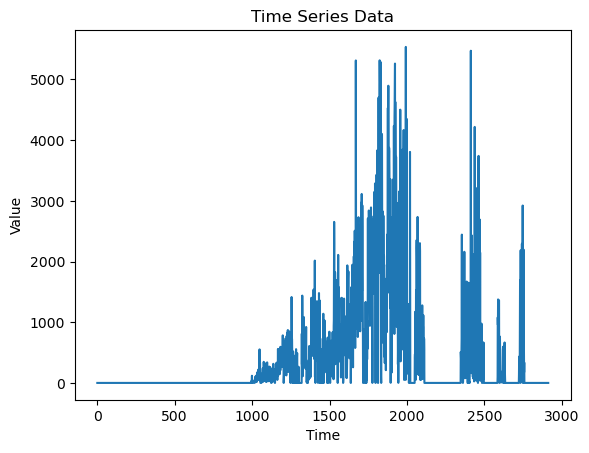

In [45]:
nonstationary_single_user_data=user_data_3d['Turnover'][user_data_3d.index==lstmusers['UserID'][0]]
nonstationary_single_user_data


x_single_user_turnover_ravel=nonstationary_single_user_data.values.ravel()
x_single_user_turnover_ravel


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the time series to visualize it
plt.plot(x_single_user_turnover_ravel)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()



# GRID SEARCH FOR BEST PARAMS

In [46]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error

# # Function to create and train an LSTM model
# def create_lstm_model(units, learning_rate):
#     model = Sequential()
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#     model.add(LSTM(units=units, return_sequences=False))
#     model.add(Dense(units=25))
#     model.add(Dense(units=1))

#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_squared_error')
    
#     return model

# # Extract statistics from the data
# row_variance = nonstationary_single_user_data.var(axis=1, skipna=True).iloc[0]
# row_mean = nonstationary_single_user_data.mean(axis=1).iloc[0]
# row_std = nonstationary_single_user_data.std(axis=1).iloc[0]

# print(f'Mean: {row_mean}')
# print(f'Standard Deviation: {row_std}')
# print(f'Variance: {row_variance}')

# # Flatten the data
# nonstationary_single_user_data_ravel = nonstationary_single_user_data.values.ravel()

# test_weeks = 3

# # Set the length of training data 
# training_data_monthly_len = len(nonstationary_single_user_data_ravel) - 7 * test_weeks

# # Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(nonstationary_single_user_data_ravel.reshape(-1, 1))
# train_data_monthly = scaled_data[0:int(training_data_monthly_len), :]

# # Prepare the training data
# x_train = []
# y_train = []

# for i in range(7 * test_weeks, len(train_data_monthly)):
#     x_train.append(train_data_monthly[i - 7 * test_weeks:i, 0])
#     y_train.append(train_data_monthly[i, 0])

# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# # Define hyperparameters for tuning
# units_values = [64, 128, 256]
# learning_rate_values = [0.01, 0.001, 0.0001]

# best_rmse = float('inf')
# best_params = None

# # Perform grid search
# for units in units_values:
#     for learning_rate in learning_rate_values:
#         model = create_lstm_model(units, learning_rate)
        
#         # Train the model
#         model.fit(x_train, y_train, batch_size=1, epochs=3, verbose=0)

#         # Prepare the testing data
#         test_data = scaled_data[training_data_monthly_len - 7 * test_weeks:, :]
#         x_test = []

#         for i in range(7 * test_weeks, len(test_data)):
#             x_test.append(test_data[i - (7 * test_weeks):i, 0])

#         x_test = np.array(x_test)
#         x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#         # Get predictions
#         predictions = model.predict(x_test)
#         predictions = scaler.inverse_transform(predictions)

#         # Get the root mean squared error (RMSE)
#         rmse = np.sqrt(mean_squared_error(predictions, nonstationary_single_user_data_ravel[training_data_monthly_len:]))
        
#         print(f"Units: {units}, Learning Rate: {learning_rate}, Test RMSE: {rmse}")

#         # Update the best parameters if RMSE is improved
#         if rmse < best_rmse:
#             best_rmse = rmse
#             best_params = {'units': units, 'learning_rate': learning_rate}

# # Print the best hyperparameters
# print(f"Best Hyperparameters: {best_params}, Best RMSE: {best_rmse}")


In [47]:
# Mean: 35.68018188057653
# Standard Deviation: 122.09556811748713
# Variance: 14907.32775393194
# 1/1 [==============================] - 1s 853ms/step
# Units: 64, Learning Rate: 0.01, Test RMSE: 375.2553253207926
# 1/1 [==============================] - 1s 840ms/step
# Units: 64, Learning Rate: 0.001, Test RMSE: 231.66883181925292
# 1/1 [==============================] - 1s 907ms/step
# Units: 64, Learning Rate: 0.0001, Test RMSE: 299.90232400037746
# 1/1 [==============================] - 1s 902ms/step
# Units: 128, Learning Rate: 0.01, Test RMSE: 398.97323688410444
# 1/1 [==============================] - 1s 879ms/step
# Units: 128, Learning Rate: 0.001, Test RMSE: 241.82620950011136
# 1/1 [==============================] - 1s 854ms/step
# Units: 128, Learning Rate: 0.0001, Test RMSE: 279.9525872191042
# 1/1 [==============================] - 1s 886ms/step
# Units: 256, Learning Rate: 0.01, Test RMSE: 398.22153453188594
# 1/1 [==============================] - 1s 876ms/step
# Units: 256, Learning Rate: 0.001, Test RMSE: 289.69737162552474
# 1/1 [==============================] - 1s 879ms/step
# Units: 256, Learning Rate: 0.0001, Test RMSE: 266.59826253364014
# Best Hyperparameters: {'units': 64, 'learning_rate': 0.001}, Best RMSE: 231.66883181925292

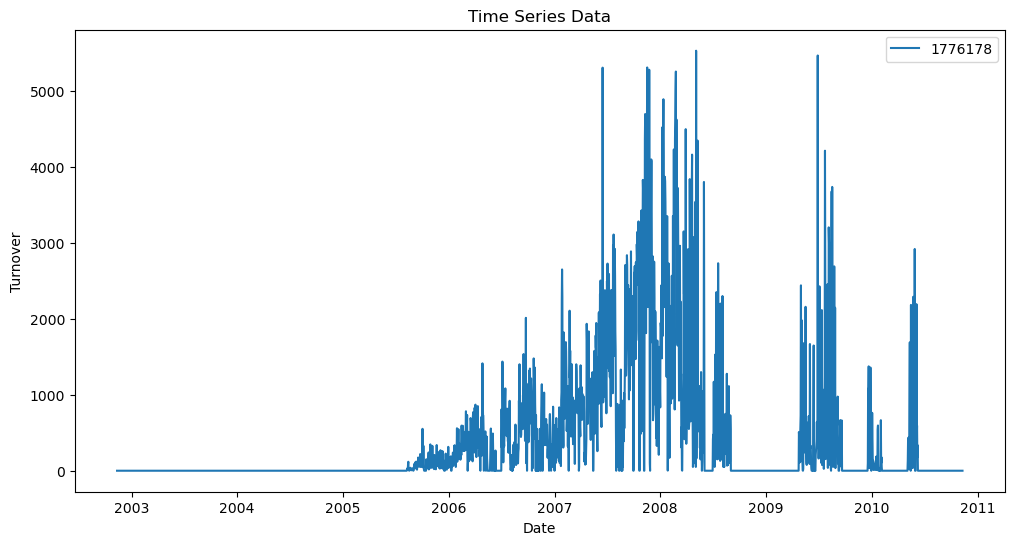

Mean: 386.32035549073436
Standard Deviation: 798.9267000819931
Variance: 638283.872103903
16/16 [==============================] - 3s 113ms/step
Test RMSE: 753.6828122432039


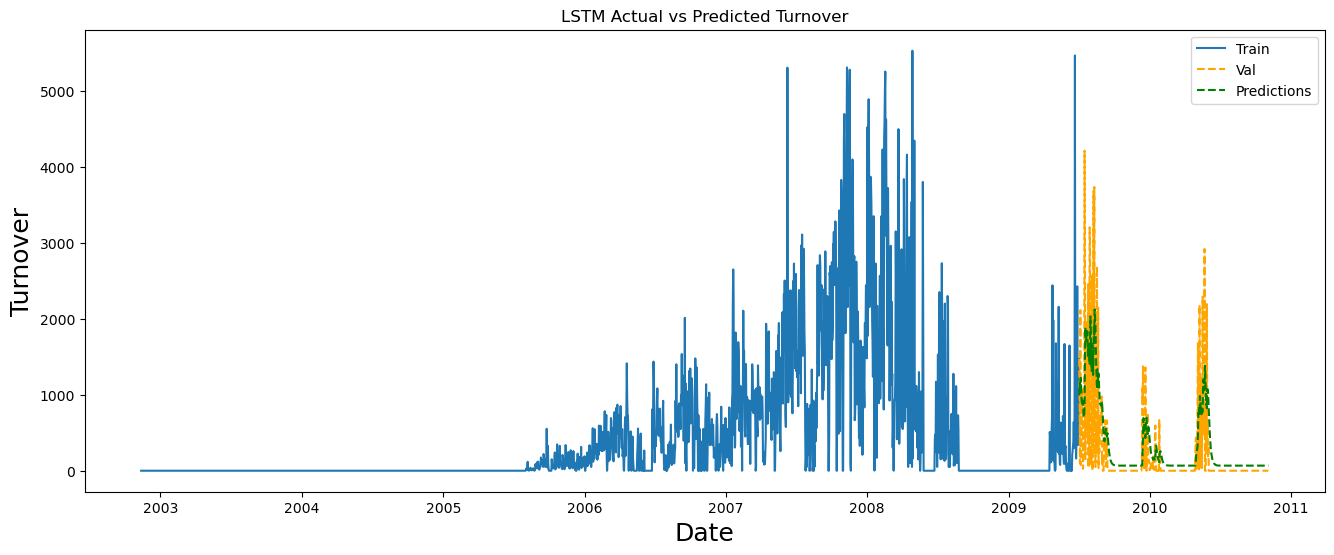

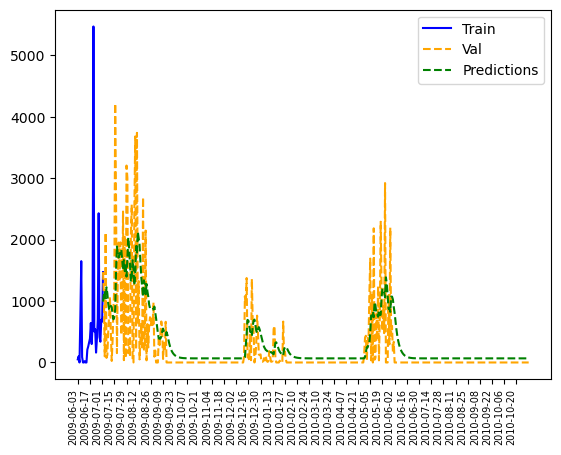

PG started right before: 2009-07-03 00:00:00
PG started right before: 2009-07-05 00:00:00
PG started right before: 2009-07-10 00:00:00
PG started right before: 2009-07-14 00:00:00
PG started right before: 2009-07-15 00:00:00
PG started right before: 2009-07-16 00:00:00
PG started right before: 2009-07-17 00:00:00
PG started right before: 2009-07-20 00:00:00
PG started right before: 2009-07-22 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-07-27 00:00:00
PG started right before: 2009-07-29 00:00:00
PG started right before: 2009-07-30 00:00:00
PG started right before: 2009-08-03 00:00:00
PG started right before: 2009-08-04 00:00:00
PG started right before: 2009-08-07 00:00:00
PG started right before: 2009-08-08 00:00:00
PG started right before: 2009-08-10 00:00:00
PG started right before: 2009-08-17 00:00:00
PG started right before: 2009-08-20 00:00:00
PG started right before: 2009-08-27 00:00:00
PG started right before: 2009-08-29 00:00:00
PG started

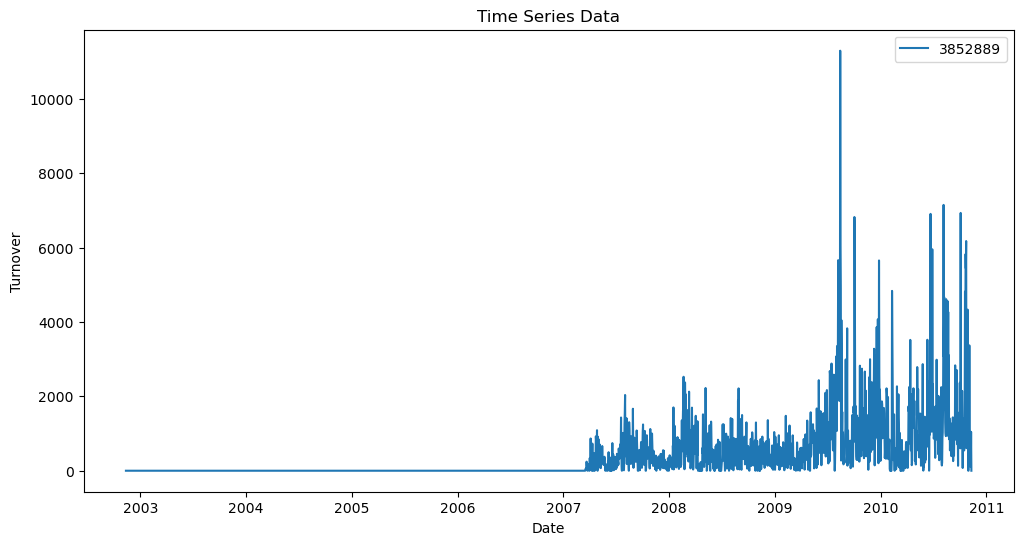

Mean: 365.90467207501774
Standard Deviation: 775.0542406959867
Variance: 600709.0760208324
16/16 [==============================] - 3s 117ms/step
Test RMSE: 1491.4773934429174


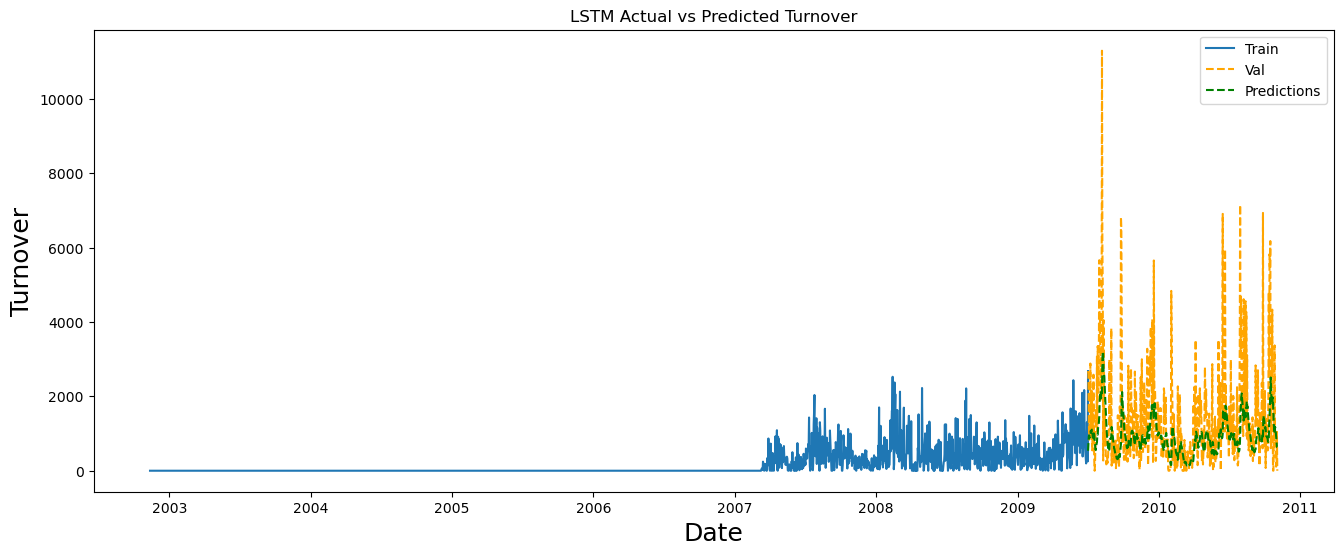

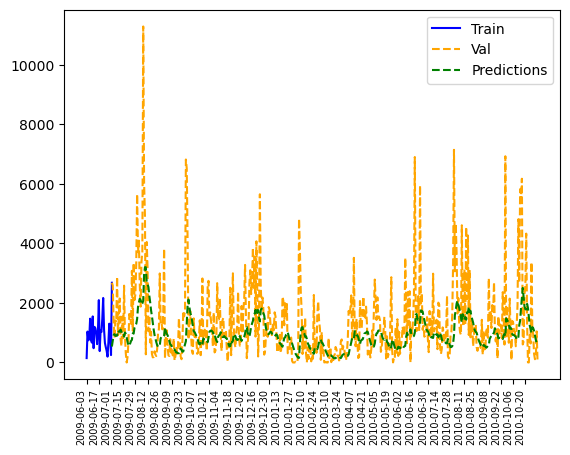

PG started right before: 2009-07-03 00:00:00
PG started right before: 2009-07-04 00:00:00
PG started right before: 2009-07-06 00:00:00
PG started right before: 2009-07-07 00:00:00
PG started right before: 2009-07-08 00:00:00
PG started right before: 2009-07-10 00:00:00
PG started right before: 2009-07-11 00:00:00
PG started right before: 2009-07-14 00:00:00
PG started right before: 2009-07-16 00:00:00
PG started right before: 2009-07-22 00:00:00
PG started right before: 2009-07-23 00:00:00
PG started right before: 2009-07-24 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-07-27 00:00:00
PG started right before: 2009-07-28 00:00:00
PG started right before: 2009-07-29 00:00:00
PG started right before: 2009-07-30 00:00:00
PG started right before: 2009-07-31 00:00:00
PG started right before: 2009-08-01 00:00:00
PG started right before: 2009-08-02 00:00:00
PG started right before: 2009-08-05 00:00:00
PG started right before: 2009-08-06 00:00:00
PG started

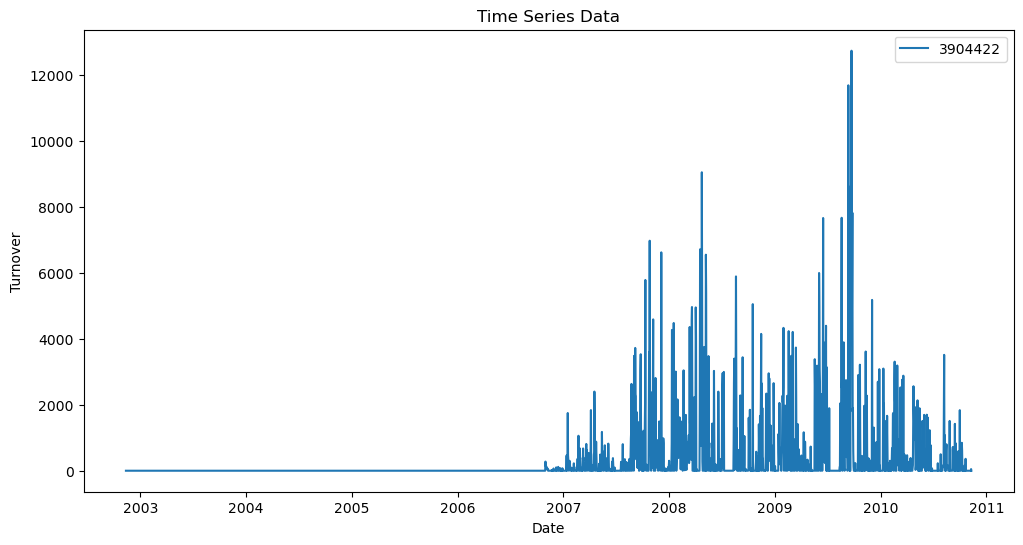

Mean: 297.5882071771934
Standard Deviation: 912.9051402201292
Variance: 833395.7950403338
16/16 [==============================] - 3s 116ms/step
Test RMSE: 1432.6417981738703


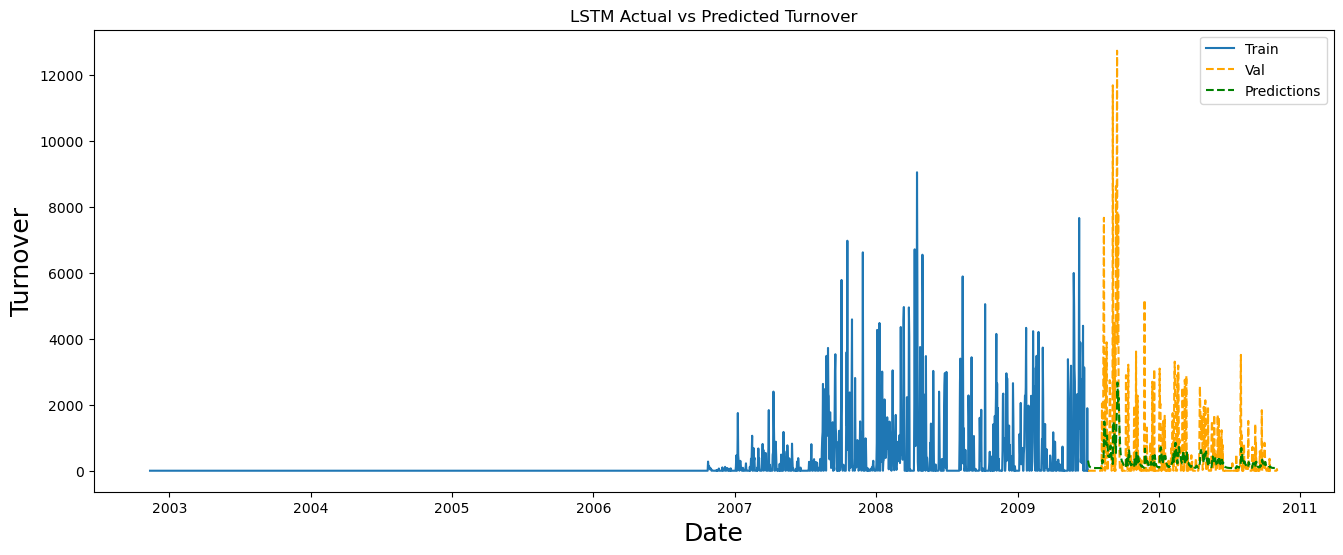

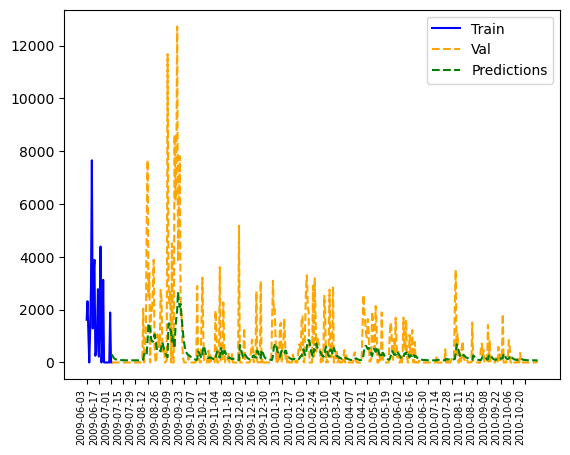

PG started right before: 2009-08-05 00:00:00
PG started right before: 2009-08-06 00:00:00
PG started right before: 2009-08-07 00:00:00
PG started right before: 2009-08-10 00:00:00
PG started right before: 2009-08-11 00:00:00
PG started right before: 2009-08-12 00:00:00
PG started right before: 2009-08-18 00:00:00
PG started right before: 2009-08-19 00:00:00
PG started right before: 2009-08-23 00:00:00
PG started right before: 2009-08-25 00:00:00
PG started right before: 2009-08-27 00:00:00
PG started right before: 2009-08-28 00:00:00
PG started right before: 2009-09-04 00:00:00
PG started right before: 2009-09-05 00:00:00
PG started right before: 2009-09-09 00:00:00
PG started right before: 2009-09-12 00:00:00
PG started right before: 2009-09-13 00:00:00
PG started right before: 2009-09-14 00:00:00
PG started right before: 2009-09-15 00:00:00
PG started right before: 2009-09-18 00:00:00
PG started right before: 2009-10-07 00:00:00
PG started right before: 2009-10-08 00:00:00
PG started

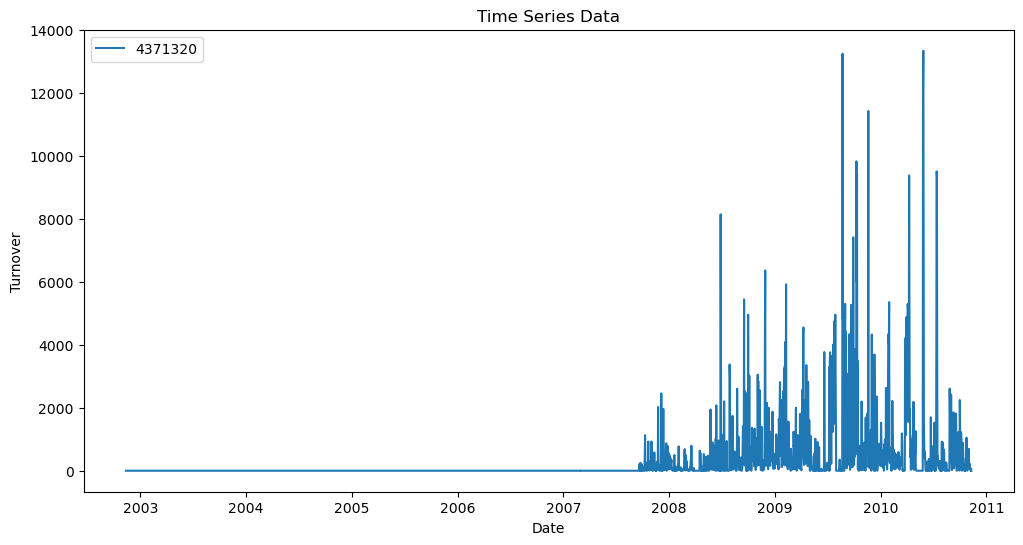

Mean: 276.44176282570834
Standard Deviation: 949.0362785545946
Variance: 900669.858012754
16/16 [==============================] - 3s 115ms/step
Test RMSE: 2001.9896908294695


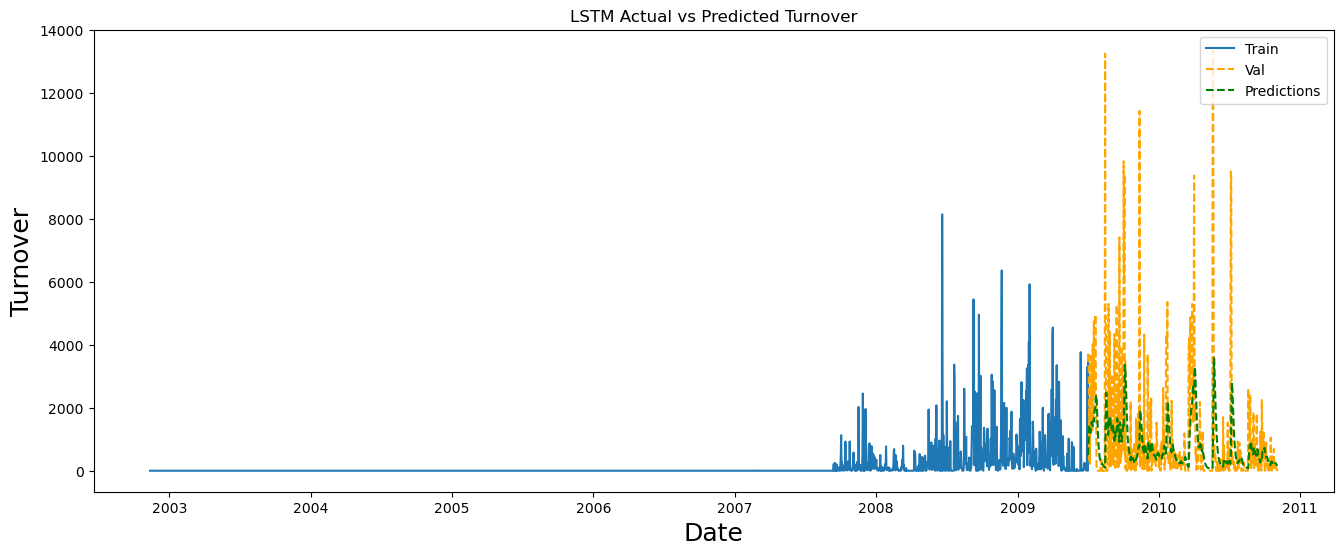

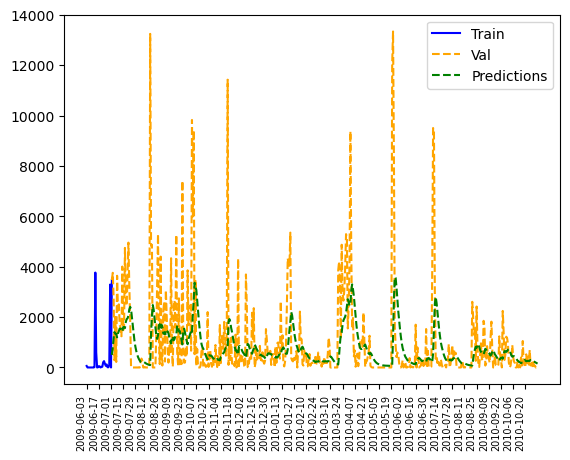

PG started right before: 2009-07-03 00:00:00
PG started right before: 2009-07-04 00:00:00
PG started right before: 2009-07-06 00:00:00
PG started right before: 2009-07-08 00:00:00
PG started right before: 2009-07-09 00:00:00
PG started right before: 2009-07-10 00:00:00
PG started right before: 2009-07-14 00:00:00
PG started right before: 2009-07-15 00:00:00
PG started right before: 2009-07-17 00:00:00
PG started right before: 2009-07-18 00:00:00
PG started right before: 2009-07-19 00:00:00
PG started right before: 2009-07-20 00:00:00
PG started right before: 2009-07-21 00:00:00
PG started right before: 2009-07-22 00:00:00
PG started right before: 2009-08-05 00:00:00
PG started right before: 2009-08-06 00:00:00
PG started right before: 2009-08-15 00:00:00
PG started right before: 2009-08-16 00:00:00
PG started right before: 2009-08-17 00:00:00
PG started right before: 2009-08-23 00:00:00
PG started right before: 2009-08-24 00:00:00
PG started right before: 2009-08-25 00:00:00
PG started

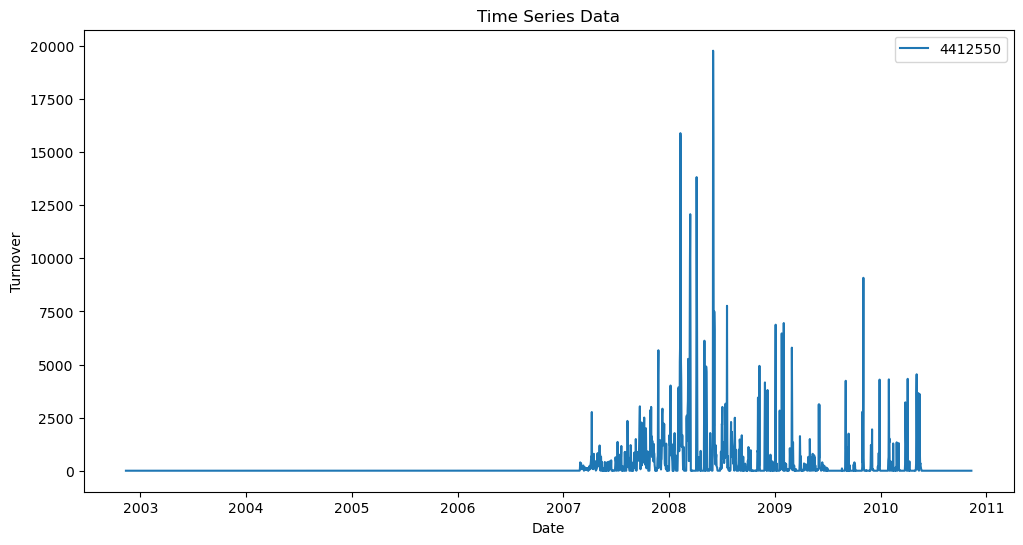

Mean: 239.93016815374057
Standard Deviation: 1034.4351019416395
Variance: 1070055.98012901
16/16 [==============================] - 3s 141ms/step
Test RMSE: 785.1005606140232


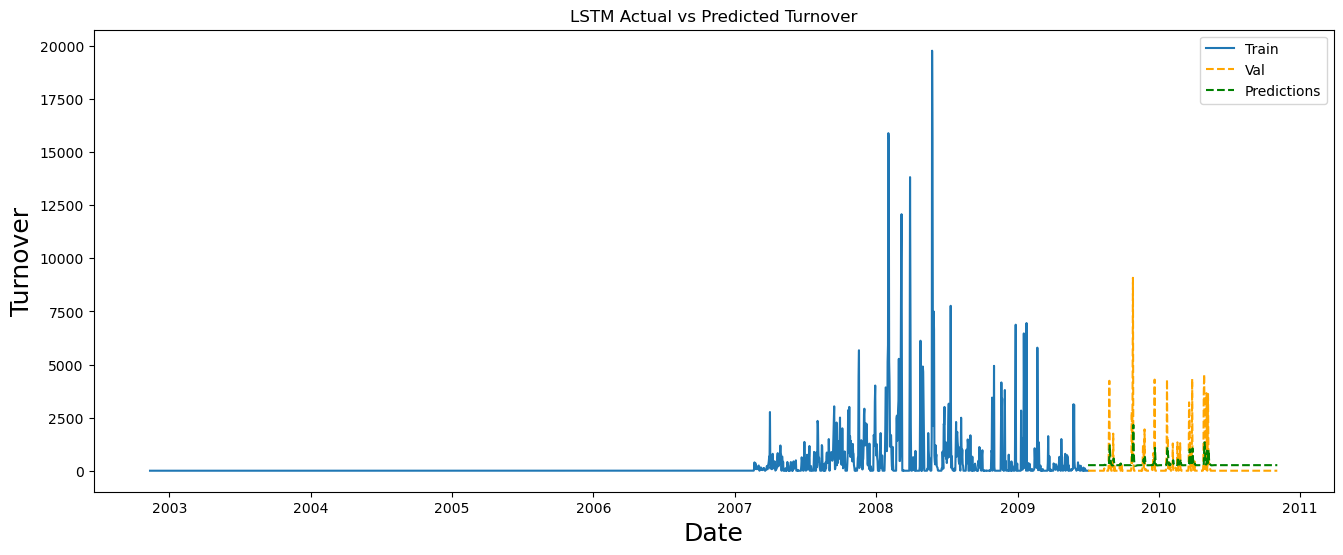

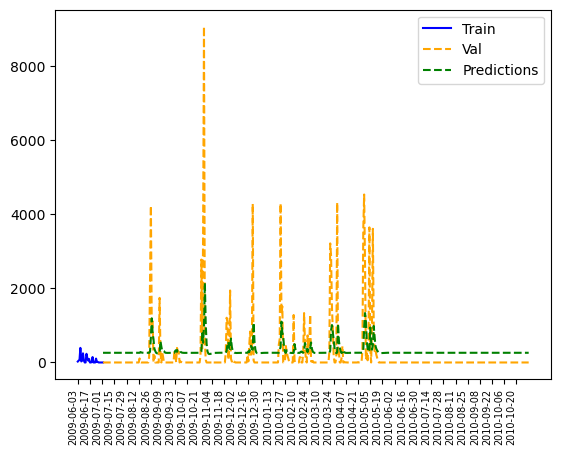

PG started right before: 2009-08-13 00:00:00
PG started right before: 2009-08-24 00:00:00
PG started right before: 2009-08-25 00:00:00
PG started right before: 2009-08-26 00:00:00
PG started right before: 2009-09-03 00:00:00
PG started right before: 2009-09-04 00:00:00
PG started right before: 2009-09-05 00:00:00
PG started right before: 2009-09-08 00:00:00
PG started right before: 2009-09-14 00:00:00
PG started right before: 2009-09-15 00:00:00
PG started right before: 2009-09-16 00:00:00
PG started right before: 2009-09-22 00:00:00
PG started right before: 2009-09-23 00:00:00
PG started right before: 2009-09-25 00:00:00
PG started right before: 2009-09-26 00:00:00
PG started right before: 2009-10-22 00:00:00
PG started right before: 2009-10-23 00:00:00
PG started right before: 2009-10-25 00:00:00
PG started right before: 2009-10-26 00:00:00
PG started right before: 2009-11-01 00:00:00
PG started right before: 2009-11-02 00:00:00
PG started right before: 2009-11-03 00:00:00
PG started

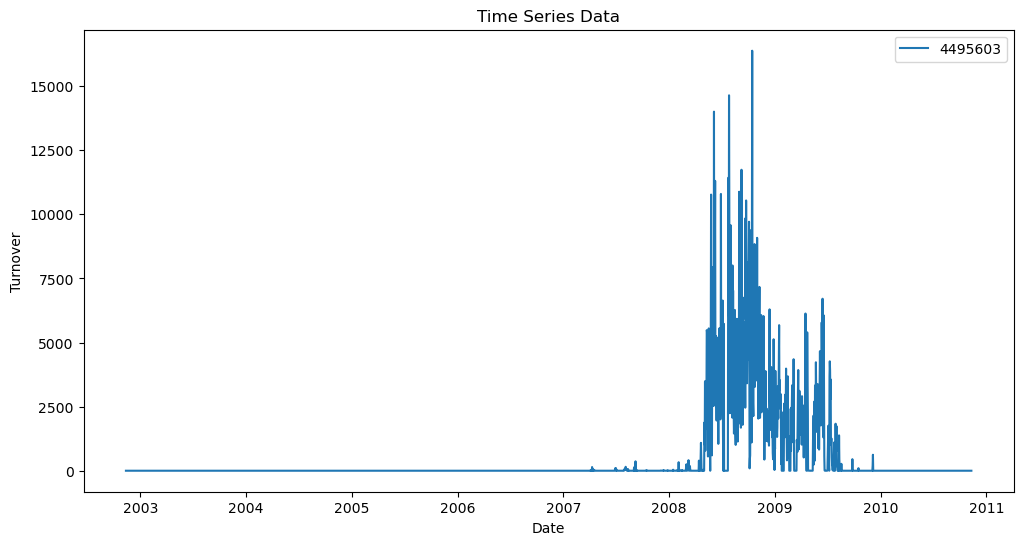

Mean: 445.9454516561502
Standard Deviation: 1455.7747813704814
Variance: 2119280.2140742727
16/16 [==============================] - 3s 134ms/step
Test RMSE: 424.003388530698


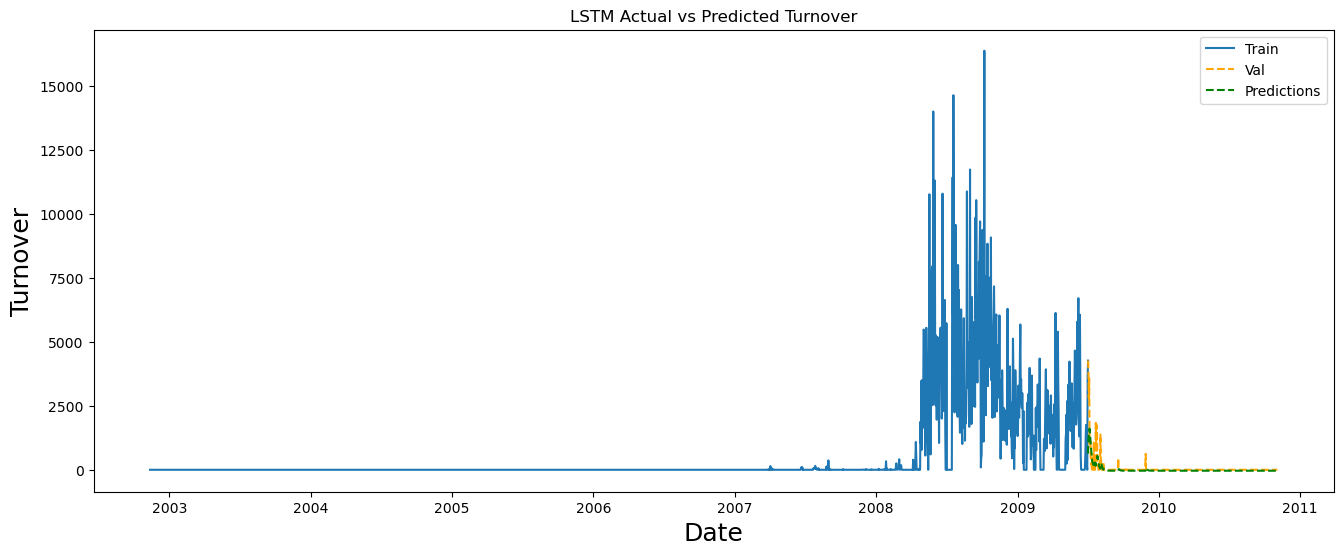

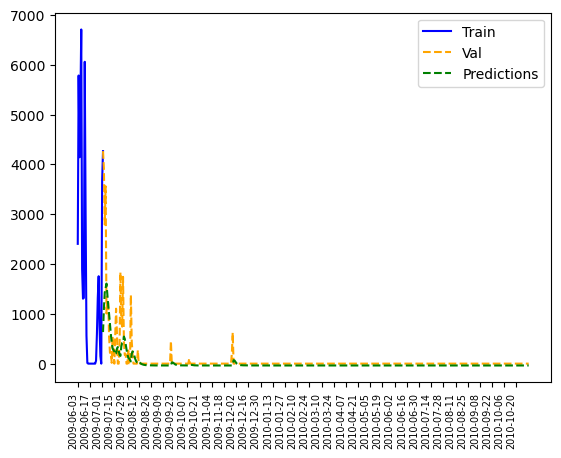

PG started right before: 2009-07-03 00:00:00
PG started right before: 2009-07-04 00:00:00
PG started right before: 2009-07-05 00:00:00
PG started right before: 2009-07-16 00:00:00
PG started right before: 2009-07-17 00:00:00
PG started right before: 2009-07-18 00:00:00
PG started right before: 2009-07-22 00:00:00
PG started right before: 2009-07-23 00:00:00
PG started right before: 2009-07-24 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-08-03 00:00:00
PG started right before: 2009-08-04 00:00:00
PG started right before: 2009-08-11 00:00:00
PG started right before: 2009-09-18 00:00:00
PG started right before: 2009-09-19 00:00:00
PG started right before: 2009-10-09 00:00:00
PG started right before: 2009-11-27 00:00:00
PG started right before: 2009-11-28 00:00:00


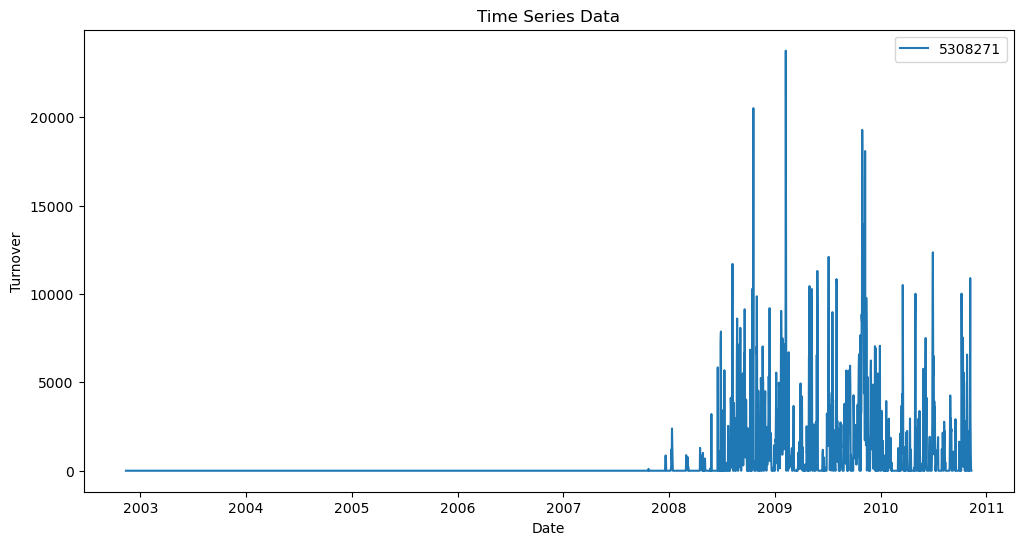

Mean: 555.0427506863418
Standard Deviation: 1780.5543780564858
Variance: 3170373.893216119
16/16 [==============================] - 3s 133ms/step
Test RMSE: 3001.5410755404837


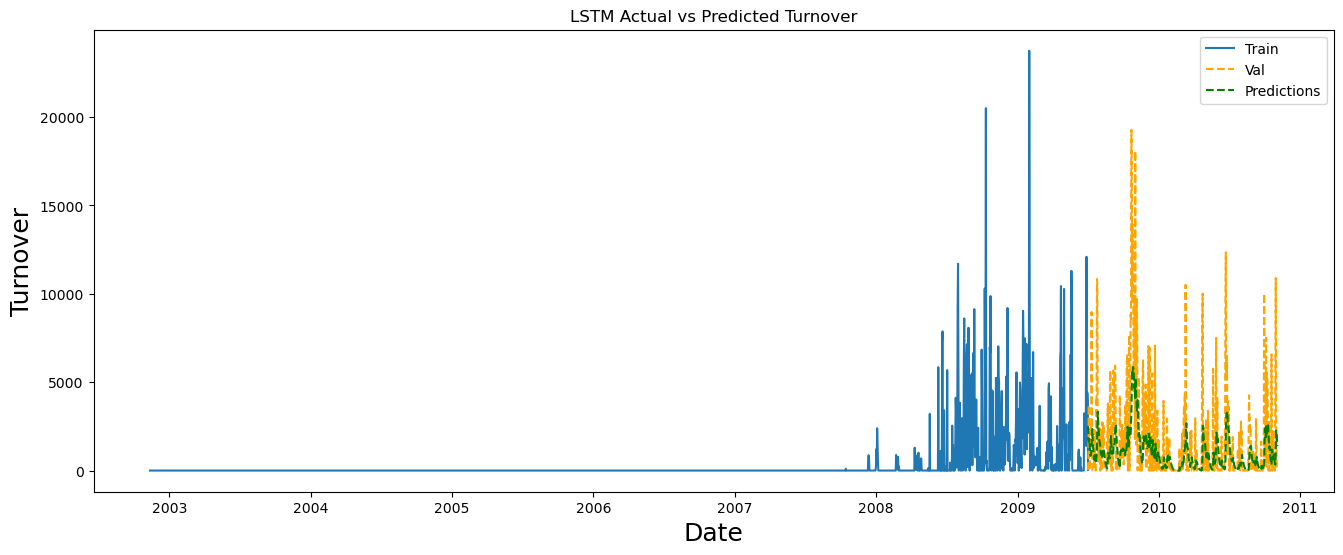

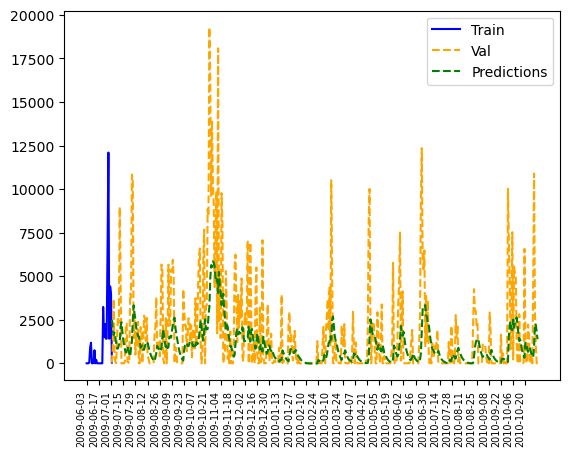

PG started right before: 2009-07-04 00:00:00
PG started right before: 2009-07-08 00:00:00
PG started right before: 2009-07-09 00:00:00
PG started right before: 2009-07-10 00:00:00
PG started right before: 2009-07-11 00:00:00
PG started right before: 2009-07-12 00:00:00
PG started right before: 2009-07-18 00:00:00
PG started right before: 2009-07-19 00:00:00
PG started right before: 2009-07-23 00:00:00
PG started right before: 2009-07-24 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-07-26 00:00:00
PG started right before: 2009-08-04 00:00:00
PG started right before: 2009-08-05 00:00:00
PG started right before: 2009-08-08 00:00:00
PG started right before: 2009-08-09 00:00:00
PG started right before: 2009-08-11 00:00:00
PG started right before: 2009-08-20 00:00:00
PG started right before: 2009-08-21 00:00:00
PG started right before: 2009-08-22 00:00:00
PG started right before: 2009-08-25 00:00:00
PG started right before: 2009-08-27 00:00:00
PG started

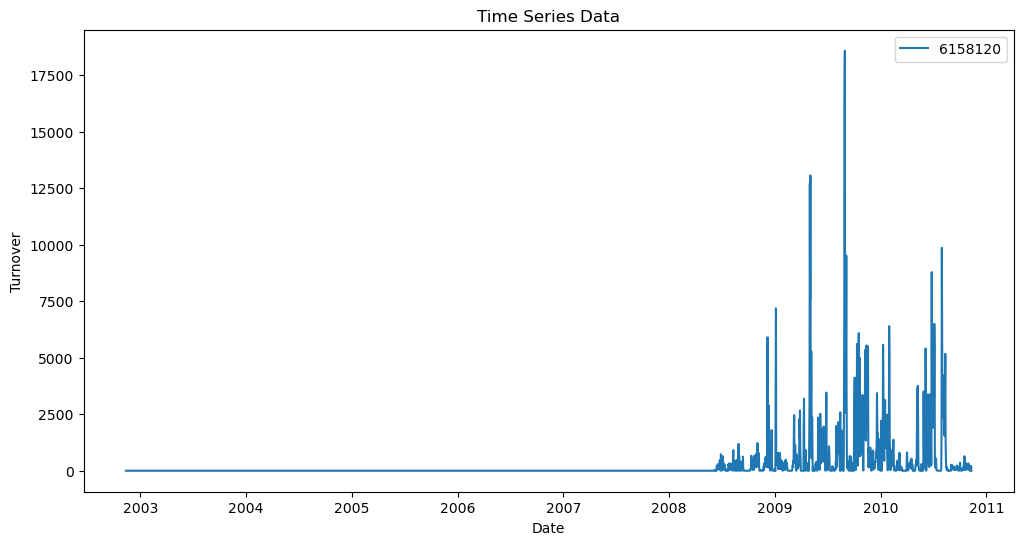

Mean: 238.77552505147563
Standard Deviation: 980.4562732027541
Variance: 961294.5036626337
16/16 [==============================] - 3s 146ms/step
Test RMSE: 2168.888929894874


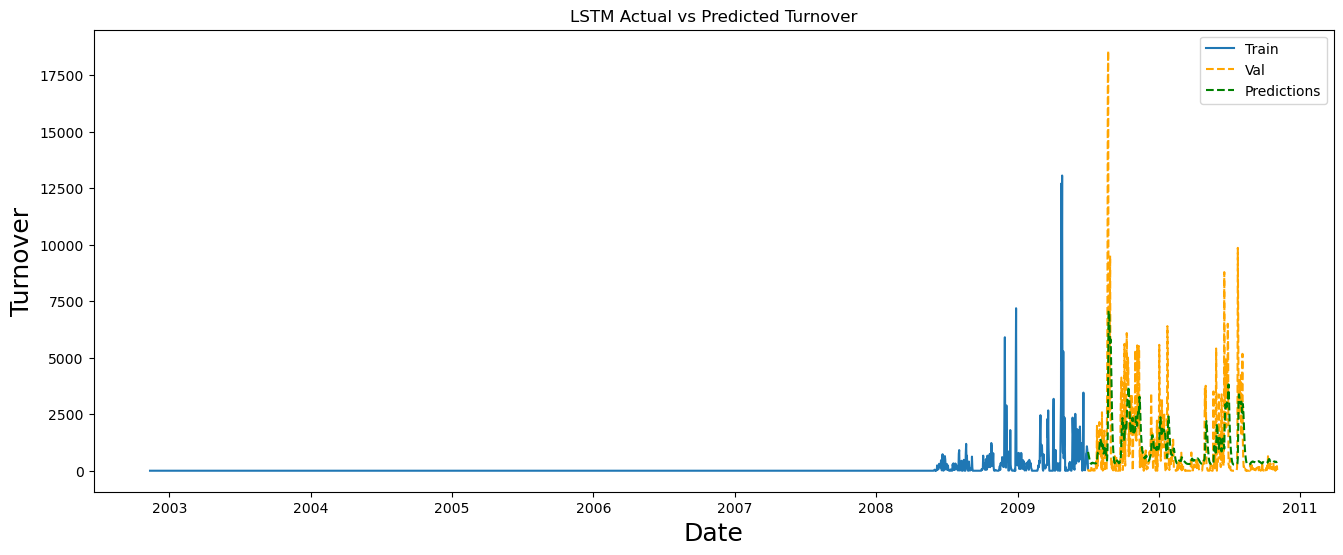

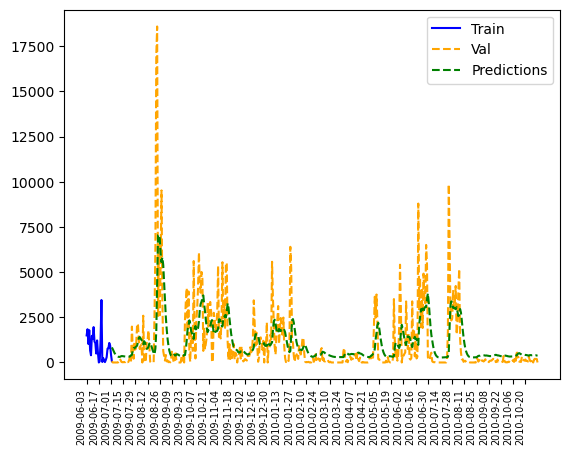

PG started right before: 2009-07-11 00:00:00
PG started right before: 2009-07-12 00:00:00
PG started right before: 2009-07-18 00:00:00
PG started right before: 2009-07-22 00:00:00
PG started right before: 2009-07-23 00:00:00
PG started right before: 2009-07-24 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-07-26 00:00:00
PG started right before: 2009-07-28 00:00:00
PG started right before: 2009-07-29 00:00:00
PG started right before: 2009-07-30 00:00:00
PG started right before: 2009-07-31 00:00:00
PG started right before: 2009-08-01 00:00:00
PG started right before: 2009-08-02 00:00:00
PG started right before: 2009-08-07 00:00:00
PG started right before: 2009-08-11 00:00:00
PG started right before: 2009-08-12 00:00:00
PG started right before: 2009-08-13 00:00:00
PG started right before: 2009-08-14 00:00:00
PG started right before: 2009-08-20 00:00:00
PG started right before: 2009-08-21 00:00:00
PG started right before: 2009-08-22 00:00:00
PG started

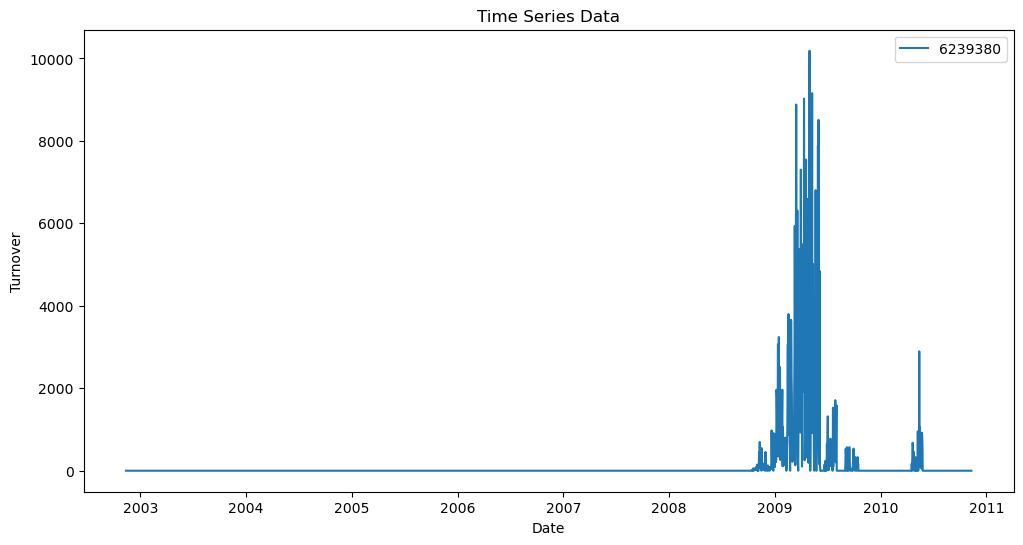

Mean: 147.61094715168153
Standard Deviation: 780.2908435877481
Variance: 608853.8005868795
16/16 [==============================] - 3s 148ms/step
Test RMSE: 300.77869089790227


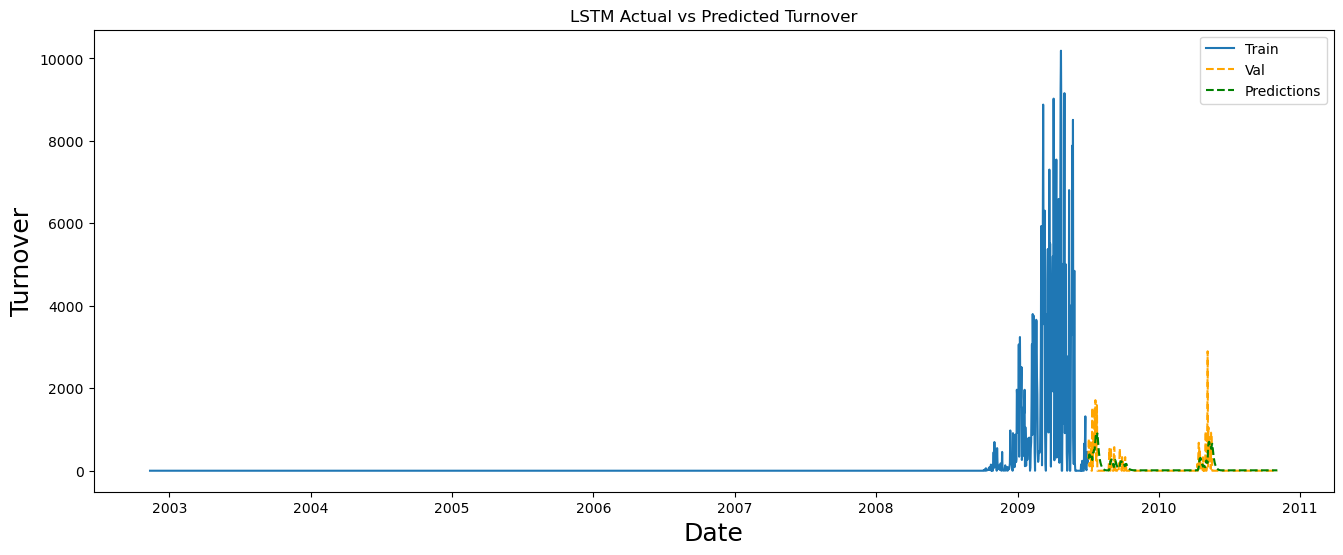

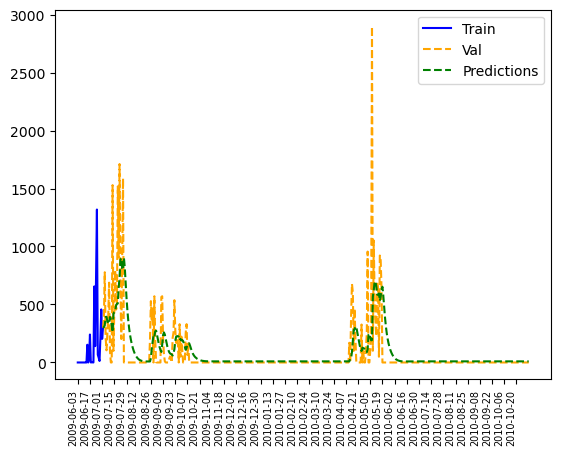

PG started right before: 2009-07-03 00:00:00
PG started right before: 2009-07-04 00:00:00
PG started right before: 2009-07-05 00:00:00
PG started right before: 2009-07-08 00:00:00
PG started right before: 2009-07-09 00:00:00
PG started right before: 2009-07-13 00:00:00
PG started right before: 2009-07-14 00:00:00
PG started right before: 2009-07-15 00:00:00
PG started right before: 2009-07-16 00:00:00
PG started right before: 2009-07-17 00:00:00
PG started right before: 2009-07-18 00:00:00
PG started right before: 2009-07-19 00:00:00
PG started right before: 2009-07-20 00:00:00
PG started right before: 2009-07-21 00:00:00
PG started right before: 2009-07-22 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-08-25 00:00:00
PG started right before: 2009-08-26 00:00:00
PG started right before: 2009-08-27 00:00:00
PG started right before: 2009-08-28 00:00:00
PG started right before: 2009-08-30 00:00:00
PG started right before: 2009-08-31 00:00:00
PG started

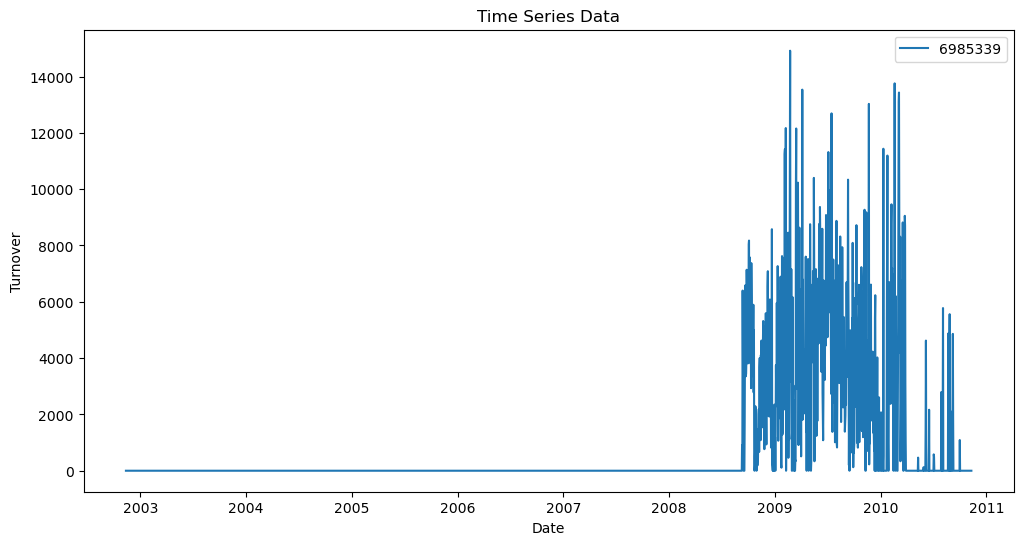

Mean: 761.8822115991763
Standard Deviation: 2004.6482107288575
Variance: 4018614.44877841
16/16 [==============================] - 3s 150ms/step
Test RMSE: 3446.4250430570637


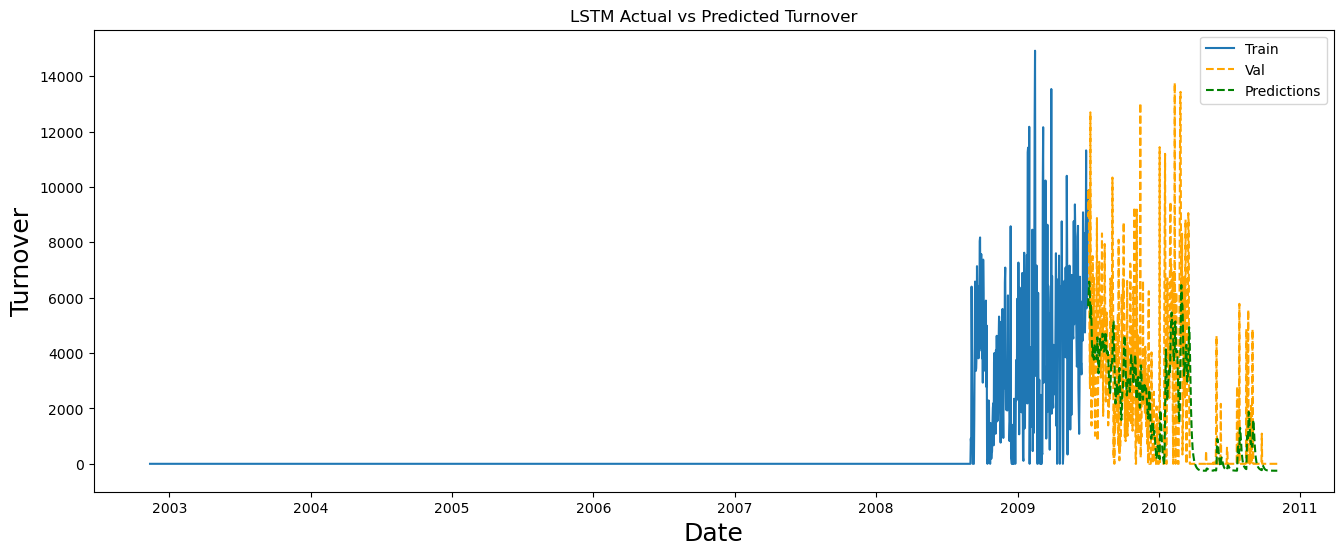

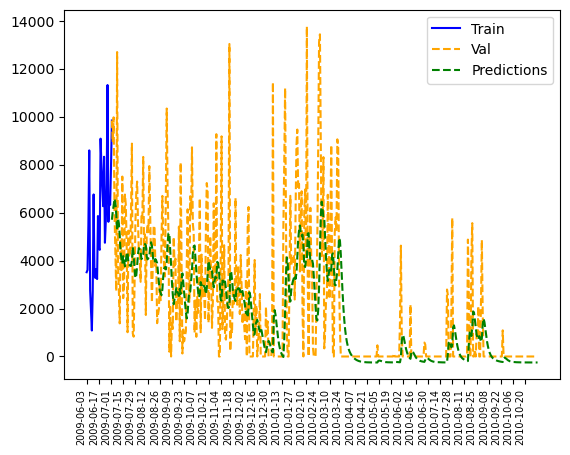

PG started right before: 2009-07-03 00:00:00
PG started right before: 2009-07-04 00:00:00
PG started right before: 2009-07-08 00:00:00
PG started right before: 2009-07-14 00:00:00
PG started right before: 2009-07-17 00:00:00
PG started right before: 2009-07-18 00:00:00
PG started right before: 2009-07-19 00:00:00
PG started right before: 2009-07-24 00:00:00
PG started right before: 2009-07-25 00:00:00
PG started right before: 2009-07-29 00:00:00
PG started right before: 2009-07-30 00:00:00
PG started right before: 2009-07-31 00:00:00
PG started right before: 2009-08-01 00:00:00
PG started right before: 2009-08-05 00:00:00
PG started right before: 2009-08-06 00:00:00
PG started right before: 2009-08-07 00:00:00
PG started right before: 2009-08-12 00:00:00
PG started right before: 2009-08-13 00:00:00
PG started right before: 2009-08-14 00:00:00
PG started right before: 2009-08-15 00:00:00
PG started right before: 2009-08-19 00:00:00
PG started right before: 2009-08-20 00:00:00
PG started

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



for lstmuser in lstmusers['UserID']:
    


    nonstationary_single_user_data=user_data_3d['Turnover'][user_data_3d.index==lstmuser]
    nonstationary_single_user_data






    x_single_user_turnover_ravel=nonstationary_single_user_data.values.ravel()
    x_single_user_turnover_ravel




    nonstationary_single_user_data_transposed = nonstationary_single_user_data.T

    # Plot the time series with dates as columns
    plt.figure(figsize=(12, 6))
    for column in nonstationary_single_user_data_transposed.columns:
        plt.plot(nonstationary_single_user_data_transposed.index, nonstationary_single_user_data_transposed[column], label=column)

    plt.xlabel('Date')
    plt.ylabel('Turnover')
    plt.title('Time Series Data')
    plt.legend()
    plt.show()






    # Extract statistics from the data
    row_variance = nonstationary_single_user_data.var(axis=1, skipna=True).iloc[0]
    row_mean = nonstationary_single_user_data.mean(axis=1).iloc[0]
    row_std = nonstationary_single_user_data.std(axis=1).iloc[0]

    print(f'Mean: {row_mean}')
    print(f'Standard Deviation: {row_std}')
    print(f'Variance: {row_variance}')

    # Flatten the data
    nonstationary_single_user_data_ravel = nonstationary_single_user_data.values.ravel()

    test_weeks=70

    # Set the length of training data 
    training_data_monthly_len = len(nonstationary_single_user_data_ravel) - 7*test_weeks

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(nonstationary_single_user_data_ravel.reshape(-1, 1))
    train_data_monthly = scaled_data[0:int(training_data_monthly_len), :]

    # Prepare the training data
    x_train = []
    y_train = []

    for i in range(7*test_weeks, len(train_data_monthly)):
        x_train.append(train_data_monthly[i-7*test_weeks:i, 0])
        y_train.append(train_data_monthly[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Define the best hyperparameters
    best_units = 64
    best_learning_rate = 0.001

    # Build and compile the LSTM model with the best hyperparameters
    best_model = Sequential()
    best_model.add(LSTM(units=best_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    best_model.add(LSTM(units=best_units, return_sequences=False))
    best_model.add(Dense(units=25))
    best_model.add(Dense(units=1))

    optimizer = Adam(learning_rate=best_learning_rate)
    best_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    best_model.fit(x_train, y_train, batch_size=1, epochs=1)  # Adjust epochs as needed

    # Prepare the testing data
    test_data = scaled_data[training_data_monthly_len - (7*test_weeks):, :]
    x_test = []

    for i in range(7*test_weeks, len(test_data)):
        x_test.append(test_data[i-(7*test_weeks):i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get predictions
    predictions = best_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - nonstationary_single_user_data_ravel[training_data_monthly_len:]) ** 2)))
    print("Test RMSE:", rmse)



    from datetime import datetime, timedelta
    # Generate time indices
    start_date = '2002-11-12'
    end_date = '2010-11-10'
    #test_window_lastweek='2010-11-03'


    end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

    time_index_train = pd.date_range(start=start_date,  periods=training_data_monthly_len+(1),freq=frequency)
    time_index_test = pd.date_range(start=end_date_dt - timedelta(days=(7 * (test_weeks+1)-1)), periods=len(x_test),freq=frequency)

    # Visualize the data
    train = nonstationary_single_user_data_ravel[:training_data_monthly_len+(1)]
    valid = pd.DataFrame({'x': nonstationary_single_user_data_ravel[training_data_monthly_len:]})
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 6))
    plt.title('LSTM Actual vs Predicted Turnover')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Turnover', fontsize=18)
    plt.plot(time_index_train, train[:])
    plt.plot(time_index_test, valid['x'], linestyle='--', color='orange')
    plt.plot(time_index_test, valid['Predictions'], linestyle='--', color='green')
    plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
    plt.show()



    # Plot only the last 30 values
    last_30_values = -30

    # Plot training data
    plt.plot(time_index_train[-30:], train[last_30_values:], linestyle='-', color='blue')

    # Plot validation data
    plt.plot(time_index_test, valid['x'], linestyle='--', color='orange')  # Use x_test_idx for x-axis
    plt.plot(time_index_test, valid['Predictions'], linestyle='--', color='green')  # Use x_test_idx for x-axis

    plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

    # Rotate x-axis labels
    plt.xticks(rotation=90, ha='right')
    # Increase the number of x-axis ticks
    plt.xticks(np.arange(time_index_train[-30], time_index_test[-1], timedelta(days=14)),fontsize=7)


    plt.show()


    # Compute differences between consecutive predicted values
    differences = np.diff(predictions.flatten())

    # Set a threshold to identify surges
    threshold_difference = 0.5  # You can adjust this threshold based on your data and requirements

    # Identify surges based on differences and threshold
    surge_indices = np.where(differences > threshold_difference)[0]

    # Print the timestamps of the points right before a surge
    for index in surge_indices:
        if index > 0:
            surge_start_timestamp = time_index_test[index]
            print(f"PG started right before: {surge_start_timestamp}")